<a href="https://colab.research.google.com/github/chinweeee/Forecasting_US_Outbound_Travel_Passengers/blob/main/%5BMRP'24%5D_FORECASTING_U_S_OUTBOUND_TRAVEL_DEMAND_WITH_HYBRID_MACHINE_LEARNING_MODELS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt




import matplotlib.pyplot as plt
color_pallete = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
#pd.set_option('display.float_format', '{:.6f}'.format)
#pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
data = pd.read_csv('new_combined.csv')
data.head()

Date           Regions  Passengers  new_Passengers
0  2013-01-01            Europe    563169.0        563169.0
1  2013-01-01         Caribbean    468194.0        468194.0
2  2013-01-01              Asia    372244.0        372244.0
3  2013-01-01     South America    125428.0        125428.0
4  2013-01-01  Central America     200178.0        200178.0

In [ ]:
data.Date = pd.to_datetime(data.Date)

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime objects
data = data.set_index('Date')  # Set 'Date' as the index

# Now you can access 'dayofweek' from the index:
dayofweek_values = data.index.dayofweek
print(dayofweek_values)

Index([1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       ...
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype='int32', name='Date', length=1056)


In [ ]:
data.head()

Regions  Passengers  new_Passengers
Date                                                    
2013-01-01            Europe    563169.0        563169.0
2013-01-01         Caribbean    468194.0        468194.0
2013-01-01              Asia    372244.0        372244.0
2013-01-01     South America    125428.0        125428.0
2013-01-01  Central America     200178.0        200178.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1056 entries, 2013-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Regions         1056 non-null   object 
 1   Passengers      1048 non-null   float64
 2   new_Passengers  1056 non-null   float64
dtypes: float64(2), object(1)
memory usage: 33.0+ KB


### Pre-Covid Analysis 2013-2019

In [ ]:
pre_covid = data.loc['2013-01-01':'2019-12-31']
pre_covid.tail()

Regions  Passengers  new_Passengers
Date                                                    
2019-12-01     South America    279714.0        279714.0
2019-12-01  Central America     373412.0        373412.0
2019-12-01           Oceania    108902.0        108902.0
2019-12-01       Middle East    252460.0        252460.0
2019-12-01            Africa     58656.0         58656.0

In [ ]:
#pre_covid['Date'] = pd.to_datetime(pre_covid['Date'])
#pre_covid.set_index('Date', inplace=True)

In [ ]:
pre_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2013-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Regions         672 non-null    object 
 1   Passengers      672 non-null    float64
 2   new_Passengers  672 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.0+ KB


In [ ]:
pre_covid.dtypes

Regions            object
Passengers        float64
new_Passengers    float64
dtype: object

In [ ]:
pre_covid.isnull().sum()

Regions           0
Passengers        0
new_Passengers    0
dtype: int64

##### Descriptive Statistics

In [ ]:
pre_covid['Passengers'].describe()

count    6.720000e+02
mean     3.759398e+05
std      4.163842e+05
min      2.034300e+04
25%      1.088165e+05
50%      2.086120e+05
75%      5.142005e+05
max      2.574573e+06
Name: Passengers, dtype: float64

#### Pre-Covid Univariate Analysis

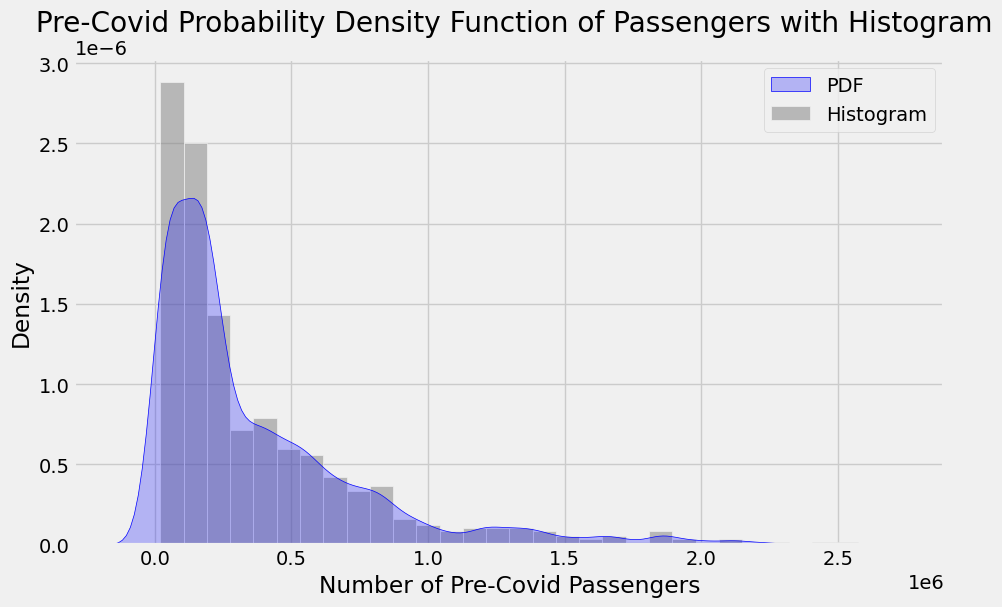

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(pre_covid['Passengers'], bins=30, kde=False, stat='density', color='gray', alpha=0.5, label='Histogram')

sns.kdeplot(pre_covid['Passengers'], bw_adjust=0.5, color='blue', label='PDF', fill=True)

plt.title(' Pre-Covid Probability Density Function of Passengers with Histogram')
plt.xlabel('Number of Pre-Covid Passengers')
plt.ylabel('Density')
plt.legend()

plt.show()

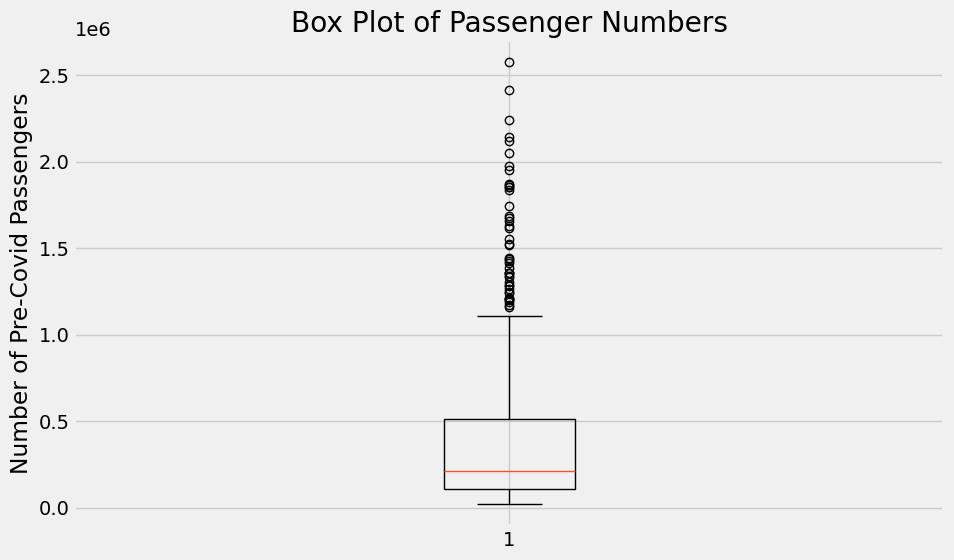

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(pre_covid['Passengers'])

plt.title('Box Plot of Passenger Numbers')
plt.ylabel('Number of Pre-Covid Passengers')
plt.grid(True)

plt.show()

In [ ]:
#pre_covid[['Date', 'Regions', 'Passengers']].info()

pre_covid[['Regions', 'Passengers']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2013-01-01 to 2019-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Regions     672 non-null    object 
 1   Passengers  672 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
pre_covid.head()

Regions  Passengers  new_Passengers
Date                                                    
2013-01-01            Europe    563169.0        563169.0
2013-01-01         Caribbean    468194.0        468194.0
2013-01-01              Asia    372244.0        372244.0
2013-01-01     South America    125428.0        125428.0
2013-01-01  Central America     200178.0        200178.0

In [ ]:
pre_covid.describe()

Passengers  new_Passengers
count  6.720000e+02    6.720000e+02
mean   3.759398e+05    3.759398e+05
std    4.163842e+05    4.163842e+05
min    2.034300e+04    2.034300e+04
25%    1.088165e+05    1.088165e+05
50%    2.086120e+05    2.086120e+05
75%    5.142005e+05    5.142005e+05
max    2.574573e+06    2.574573e+06

In [ ]:

new_pre = pre_covid[['Regions', 'Passengers']]
new_pre.head()

Regions  Passengers
Date                                    
2013-01-01            Europe    563169.0
2013-01-01         Caribbean    468194.0
2013-01-01              Asia    372244.0
2013-01-01     South America    125428.0
2013-01-01  Central America     200178.0

In [ ]:
pre_covid.tail()

Regions  Passengers  new_Passengers
Date                                                    
2019-12-01     South America    279714.0        279714.0
2019-12-01  Central America     373412.0        373412.0
2019-12-01           Oceania    108902.0        108902.0
2019-12-01       Middle East    252460.0        252460.0
2019-12-01            Africa     58656.0         58656.0

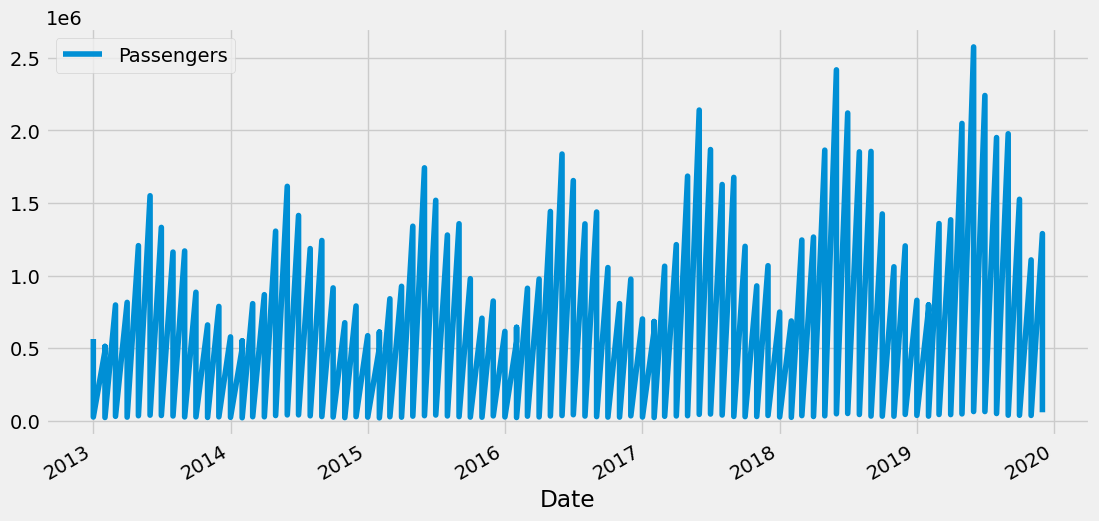

In [ ]:
pre_covid.plot(y='Passengers', kind='line', figsize=(12, 6))
plt.show()

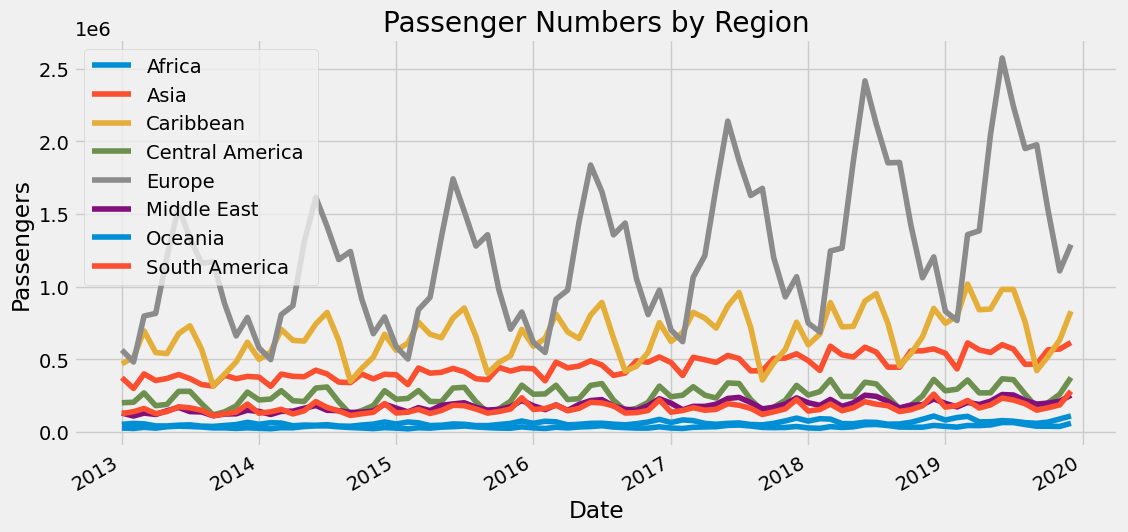

In [ ]:
pre_covid_reset = pre_covid.reset_index()

plt.figure(figsize=(12, 6))

# Group the data by 'Regions' (using pre_covid_reset)
for region, group in pre_covid_reset.groupby('Regions'):
    plt.plot(group['Date'], group['Passengers'], label=region)


plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Numbers by Region')
plt.legend()
plt.grid(True)

plt.gcf().autofmt_xdate()

plt.show()


In [ ]:
pre_covid_reset.describe()

Date    Passengers  new_Passengers
count                            672  6.720000e+02    6.720000e+02
mean   2016-06-16 01:08:34.285714176  3.759398e+05    3.759398e+05
min              2013-01-01 00:00:00  2.034300e+04    2.034300e+04
25%              2014-09-23 12:00:00  1.088165e+05    1.088165e+05
50%              2016-06-16 00:00:00  2.086120e+05    2.086120e+05
75%              2018-03-08 18:00:00  5.142005e+05    5.142005e+05
max              2019-12-01 00:00:00  2.574573e+06    2.574573e+06
std                              NaN  4.163842e+05    4.163842e+05

In [ ]:

pre_covid_reset = pre_covid.reset_index()
new_pre = pre_covid_reset[['Date', 'Regions', 'Passengers']]
new_pre.head()

Date           Regions  Passengers
0 2013-01-01            Europe    563169.0
1 2013-01-01         Caribbean    468194.0
2 2013-01-01              Asia    372244.0
3 2013-01-01     South America    125428.0
4 2013-01-01  Central America     200178.0

### Train/Test Split

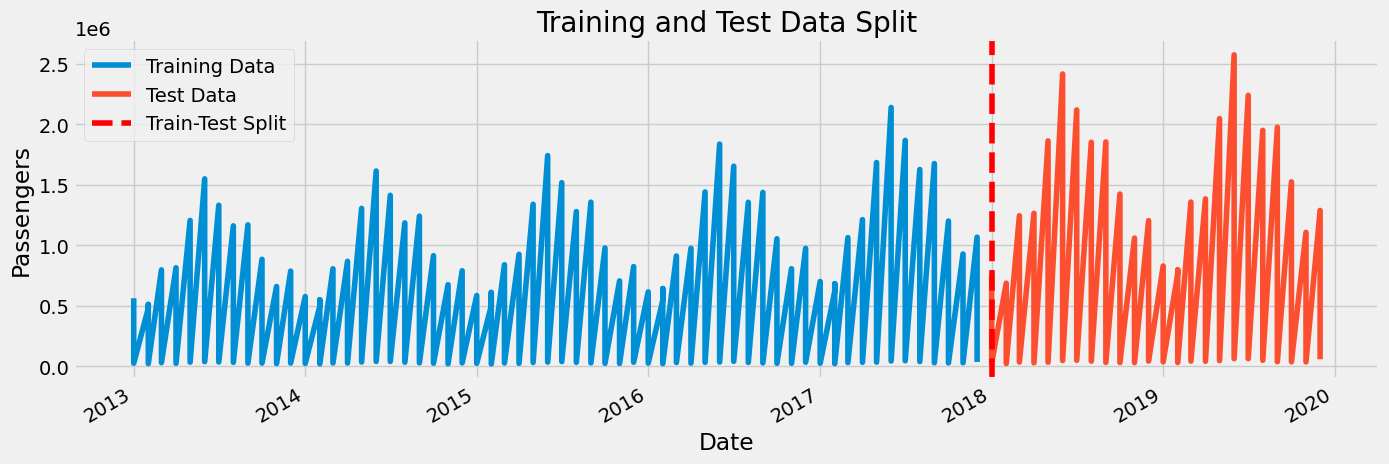

In [ ]:

train_data = new_pre[new_pre['Date'] < '2018-01-01']
test_data = new_pre[new_pre['Date'] >= '2018-01-01']

fig, ax = plt.subplots(figsize=(15, 5))

train_data.plot(x='Date', y='Passengers', ax=ax, label='Training Data')
test_data.plot(x='Date', y='Passengers', ax=ax, label='Test Data')

ax.axvline('2018-01-01', color='red', linestyle='--', label='Train-Test Split')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Training and Test Data Split')
plt.legend()
plt.grid(True)
plt.show()

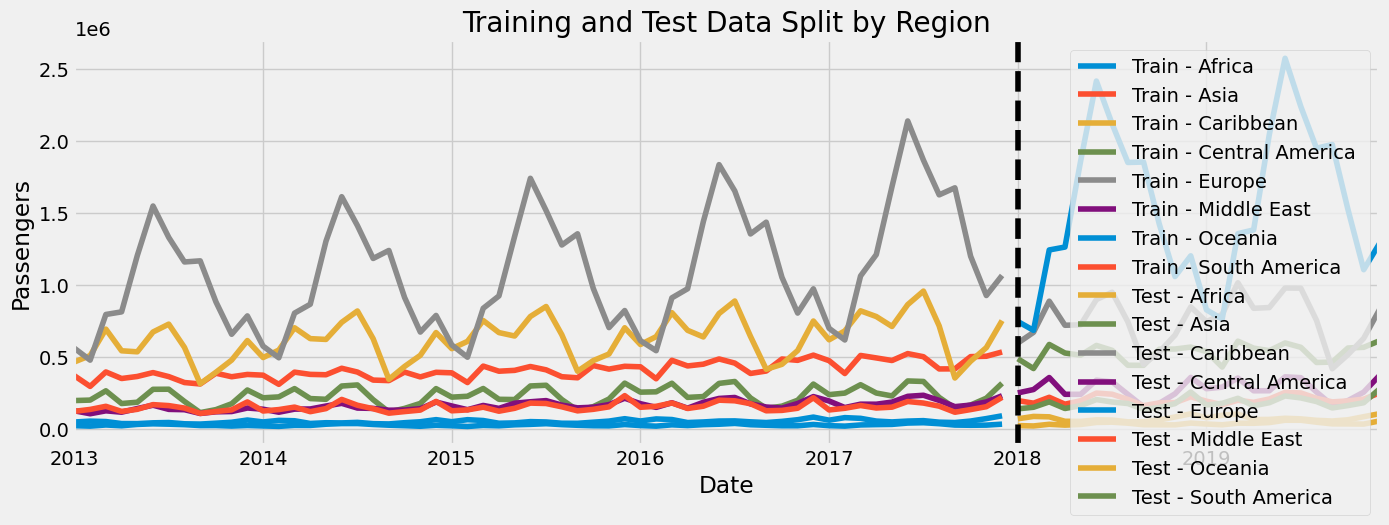

In [ ]:
train_data = new_pre[new_pre['Date'] < '2018-01-01']
test_data = new_pre[new_pre['Date'] >= '2018-01-01']

fig, ax = plt.subplots(figsize=(15, 5))

for region, group in train_data.groupby('Regions'):
    group.plot(x='Date', y='Passengers', ax=ax, label=f'Train - {region}')

for region, group in test_data.groupby('Regions'):
    group.plot(x='Date', y='Passengers', ax=ax, label=f'Test - {region}')

ax.axvline('2018-01-01', color='black', ls='--')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Training and Test Data Split by Region')
plt.legend()
plt.grid(True)
plt.show()

### Feature Creation

In [ ]:
def create_features(new_pre):
    """
    Create time series features based on time series index.
    """
    new_pre_copy = new_pre.copy()
    new_pre_copy['dayofweek'] = new_pre_copy.Date.dt.dayofweek  # Use dt accessor
    new_pre_copy['quarter'] = new_pre_copy.Date.dt.quarter
    new_pre_copy['month'] = new_pre_copy.Date.dt.month
    new_pre_copy['year'] = new_pre_copy.Date.dt.year
    new_pre_copy['dayofyear'] = new_pre_copy.Date.dt.dayofyear  # Complete the line
    return new_pre_copy


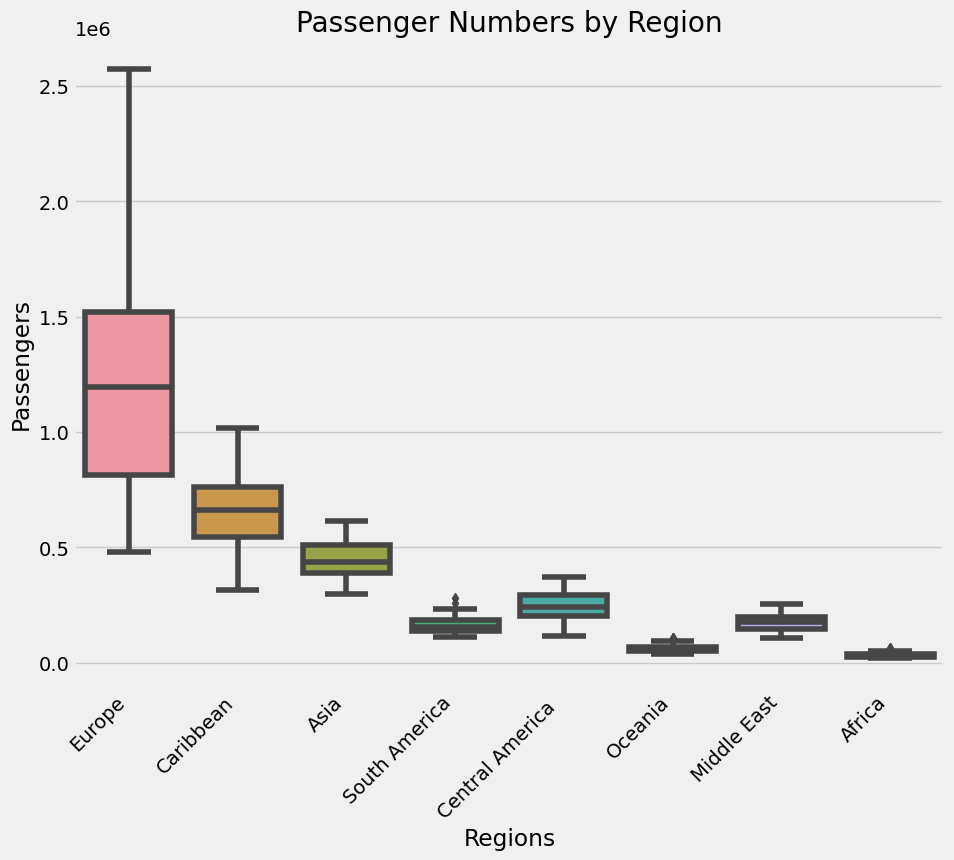

In [ ]:
new_pre_copy = create_features(new_pre)
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=new_pre_copy, x='Regions', y='Passengers')
ax.set_title('Passenger Numbers by Region')
plt.xticks(rotation=45, ha='right')
plt.show()

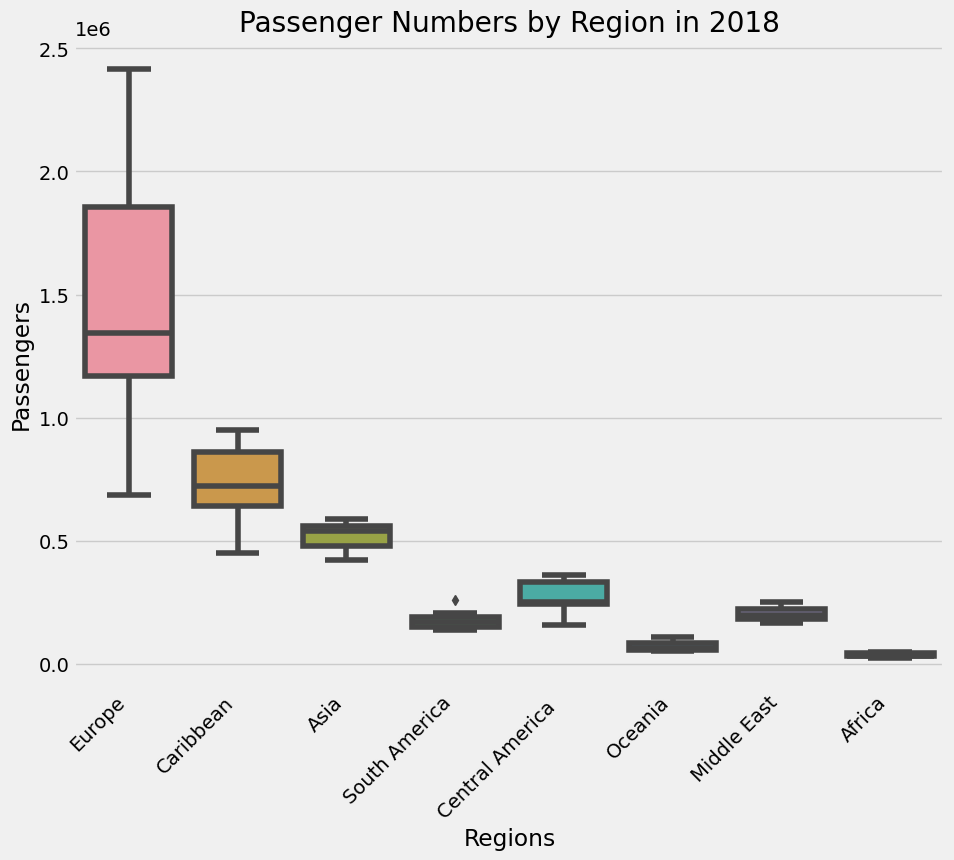

In [ ]:
for year in new_pre_copy['year'].unique():
    year_data = new_pre_copy[new_pre_copy['year'] == year]
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(data=year_data, x='Regions', y='Passengers')
    ax.set_title(f'Passenger Numbers by Region in {year}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
for region, group in new_pre_copy.groupby('Regions'):
    plt.plot(group['Date'], group['Passengers'], label=region)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Numbers by Region Over Time')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

# Time-series Forecasting Model
- ARIMA
- SARIMA

In [ ]:
test_data['Passengers'].shape

(192,)

### Using the ARIMA Model

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

history = train_data['Passengers'].tolist()
predictions = list()

# walk-forward validation
for t in range(len(test_data)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data.iloc[t]['Passengers']
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data['Passengers'], predictions))
mae = mean_absolute_error(test_data['Passengers'], predictions)
r2 = r2_score(test_data['Passengers'], predictions)


# Calculate AIC and BIC
n = len(test_data)
k = 2  # Number of parameters in ARIMA(5,1,0)

# Fit the model on the entire dataset to get the log-likelihood
model = ARIMA(train_data['Passengers'], order=(1,1,1))
model_fit = model.fit()

log_likelihood = model_fit.llf
aic = 2 * k - 2 * log_likelihood
bic = k * np.log(n) - 2 * log_likelihood

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
print(f'AIC: {aic}')
print(f'BIC: {bic}')

predicted=312253.485254, expected=748793.000000
predicted=429277.209823, expected=598896.000000
predicted=407261.326336, expected=490348.000000
predicted=390758.822185, expected=142741.000000
predicted=333305.080917, expected=253091.000000
predicted=350066.732616, expected=73516.000000
predicted=318960.436600, expected=200003.000000
predicted=338077.371265, expected=26621.000000
predicted=307533.027007, expected=687296.000000
predicted=416289.287512, expected=673271.000000
predicted=416421.056244, expected=422237.000000
predicted=376209.965632, expected=153627.000000
predicted=331362.235856, expected=276689.000000
predicted=350611.484113, expected=90014.000000
predicted=318526.416140, expected=181962.000000
predicted=332178.494165, expected=23962.000000
predicted=304141.530812, expected=1244957.000000
predicted=504842.665640, expected=889631.000000
predicted=454456.748474, expected=589421.000000
predicted=407332.705394, expected=191110.000000
predicted=340314.490940, expected=359897.00

In [ ]:
# import numpy as np
# from math import sqrt
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# # Assuming train_data and test_data are already defined
# history = train_data['Passengers'].tolist()
# predictions = list()

# # Plot ACF and PACF
# plot_acf(history)
# plot_pacf(history)
# plt.show()

# # walk-forward validation
# for t in range(len(test_data)):
#     model = ARIMA(history, order=(1,1,0))  # ARIMA(5,1,0)
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test_data.iloc[t]['Passengers']
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))

# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test_data['Passengers'], predictions))
# mae = mean_absolute_error(test_data['Passengers'], predictions)
# r2 = r2_score(test_data['Passengers'], predictions)

# # Calculate AIC and BIC
# n = len(test_data)
# k = 6  # Number of parameters in ARIMA(5,1,0)

# # Fit the model on the entire dataset to get the log-likelihood
# model = ARIMA(train_data['Passengers'], order=(5,1,0))
# model_fit = model.fit()

# log_likelihood = model_fit.llf
# aic = 2 * k - 2 * log_likelihood
# bic = k * np.log(n) - 2 * log_likelihood

# print(f'RMSE: {rmse}')
# print(f'MAE: {mae}')
# print(f'R^2: {r2}')
# print(f'AIC: {aic}')
# print(f'BIC: {bic}')

In [ ]:
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test R2: %.3f' % r2)

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Passengers'], label='Actual', linestyle='-', marker='o', color='blue')
plt.plot(test_data['Date'], predictions, label='Predicted', linestyle='--', marker='x', color='red')
plt.fill_between(test_data['Date'], 0.9 * pd.Series(predictions), 1.1 * pd.Series(predictions), color='red', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Actual vs. ARIMA Predicted Passengers')
plt.legend()
plt.grid(True)

plt.show()

Test RMSE: 509181.276
Test MAE: 328948.523
Test R2: -0.007


#### With Regions

/var/folders/29/z_qcrfh91n30mjn_998lcrcm0000gp/T/ipykernel_15904/866772190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = predictions


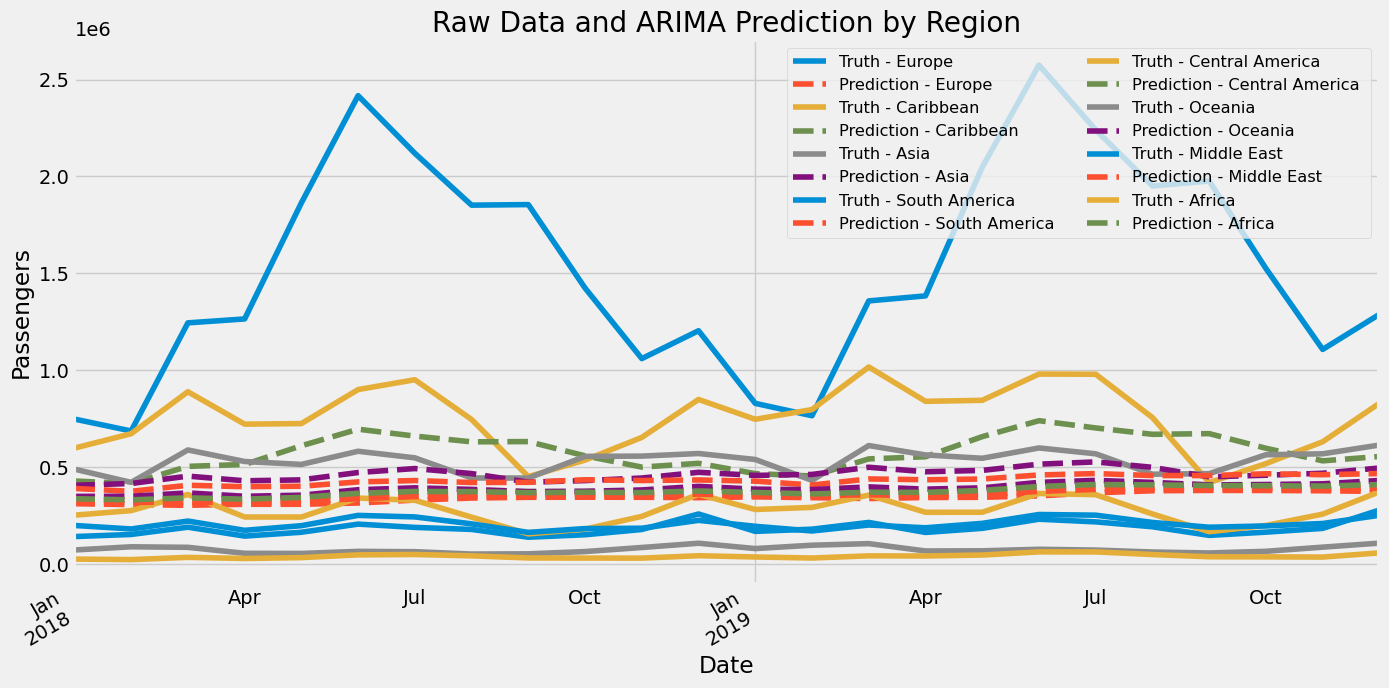

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

test_data['prediction'] = predictions

for region in test_data['Regions'].unique():
    region_data = test_data[test_data['Regions'] == region]
    region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
    region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')

plt.legend(loc='upper right', fontsize='small', ncol=2)  # Adjust location, font size, and number of columns

ax.set_title('Raw Data and ARIMA Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

## Individual ARIMA

/Users/chinwe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Region: Europe, Mean: 1532984.416667, RMSE: 343121.596321, NRMSE: 0.223826
Region: Caribbean, Mean: 752918.583333, RMSE: 155508.536309, NRMSE: 0.206541
Region: Asia, Mean: 533275.125000, RMSE: 65061.986054, NRMSE: 0.122005
Region: South America, Mean: 185103.375000, RMSE: 37131.989796, NRMSE: 0.200601
Region: Central America , Mean: 278672.958333, RMSE: 64585.511738, NRMSE: 0.231761
Region: Oceania, Mean: 75791.000000, RMSE: 15775.947368, NRMSE: 0.208151


/Users/chinwe/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Region: Middle East, Mean: 207847.708333, RMSE: 27616.965894, NRMSE: 0.132871
Region: Africa, Mean: 40999.958333, RMSE: 9126.208470, NRMSE: 0.222591
             Region         Model          RMSE    NRMSE           MAE  \
0            Europe  ARIMA(1,1,1) 343121.596321 0.223826 284167.110644   
1         Caribbean  ARIMA(1,1,1) 155508.536309 0.206541 131744.016429   
2              Asia  ARIMA(1,1,1)  65061.986054 0.122005  51120.120875   
3     South America  ARIMA(1,1,1)  37131.989796 0.200601  27842.250116   
4  Central America   ARIMA(1,1,1)  64585.511738 0.231761  54121.273510   
5           Oceania  ARIMA(1,1,1)  15775.947368 0.208151  13029.457435   
6       Middle East  ARIMA(1,1,1)  27616.965894 0.132871  23450.799757   
7            Africa  ARIMA(1,1,1)   9126.208470 0.222591   7322.239457   

        R^2        AIC        BIC           Mean  
0  0.588375 685.886237 689.420399 1532984.416667  
1  0.100544 646.938929 650.473090  752918.583333  
2 -0.272388 605.765437 609.2995

/var/folders/29/z_qcrfh91n30mjn_998lcrcm0000gp/T/ipykernel_15904/1510908837.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = all_predictions


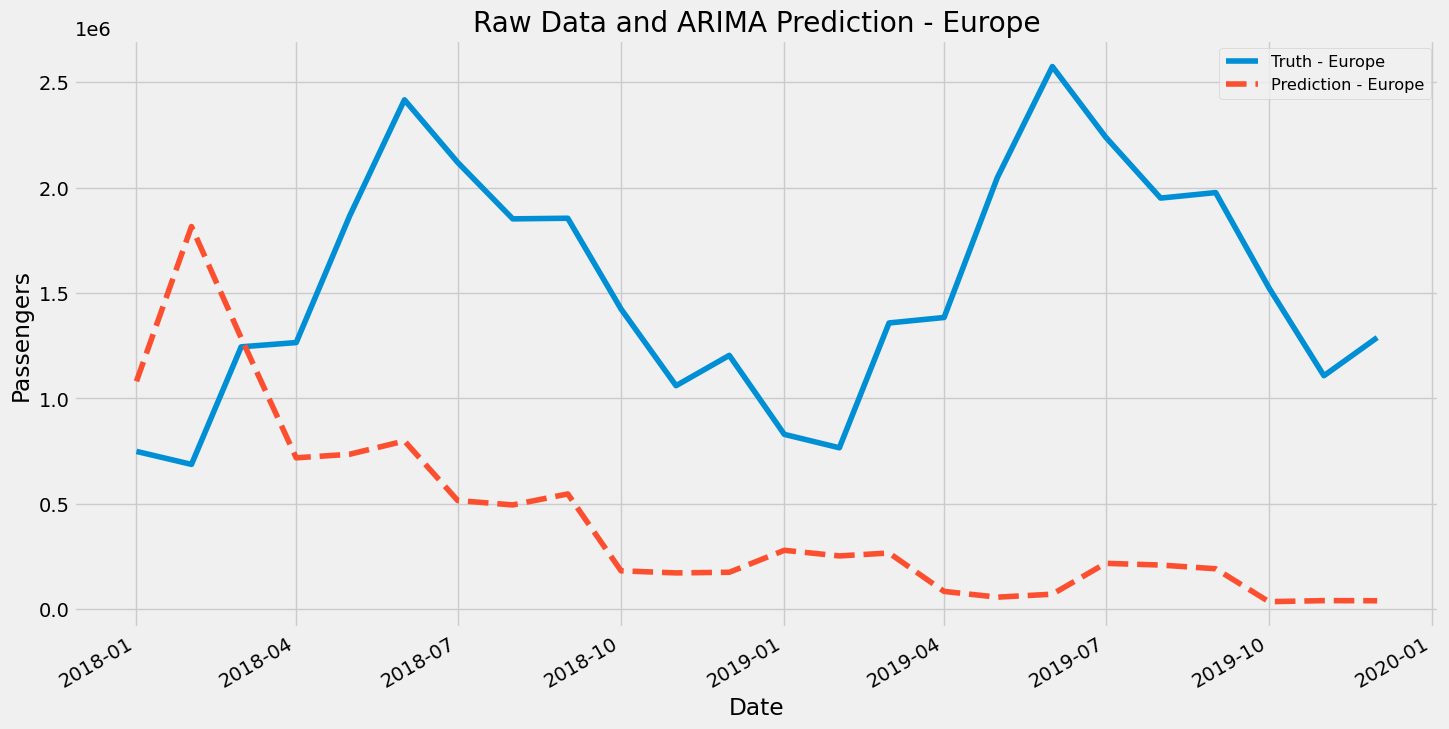

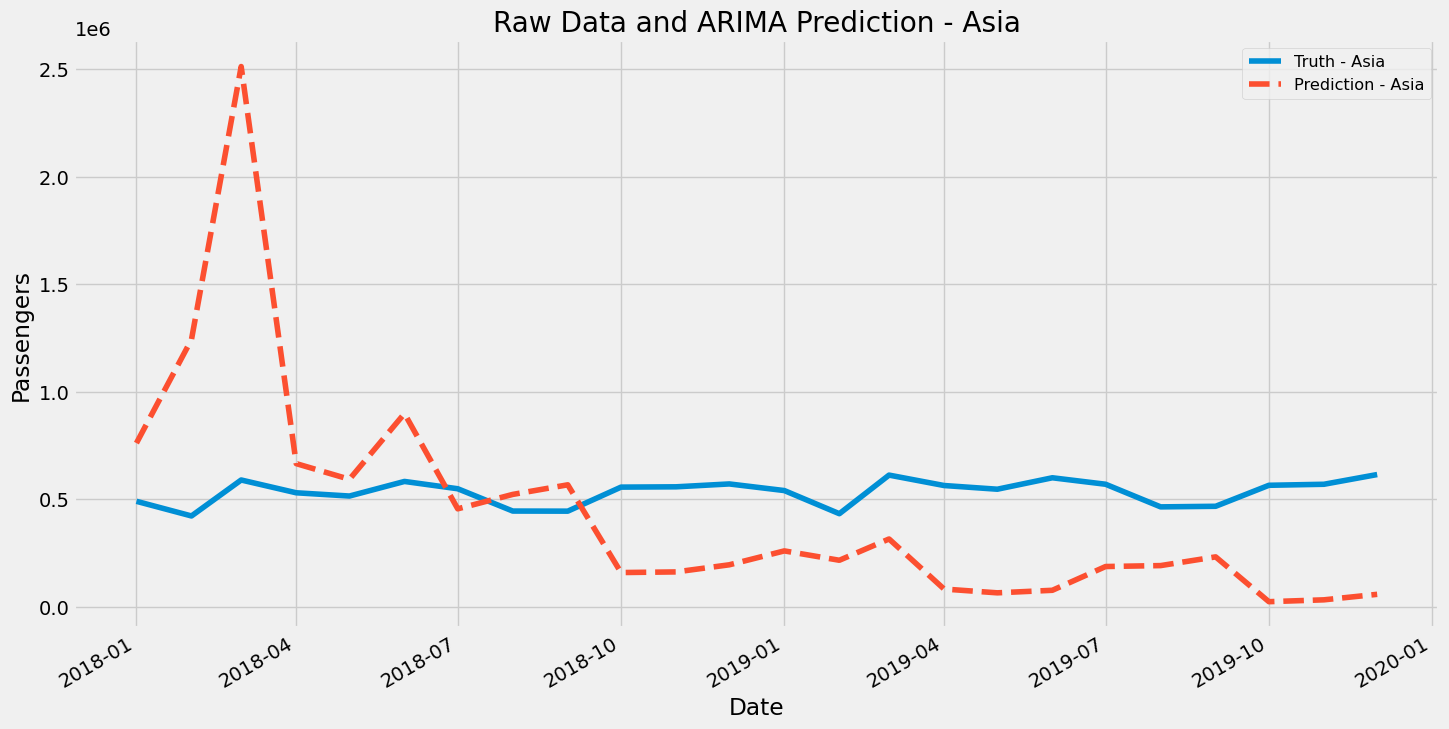

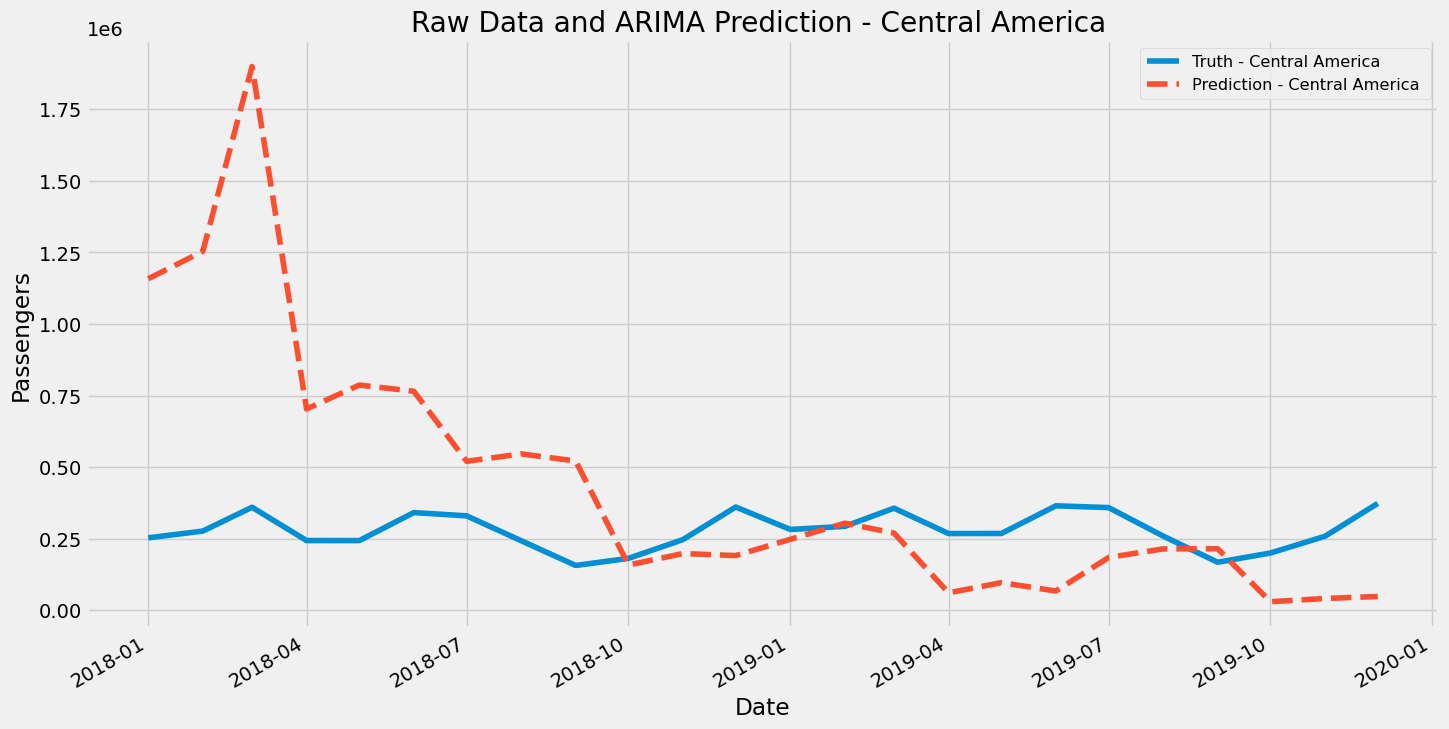

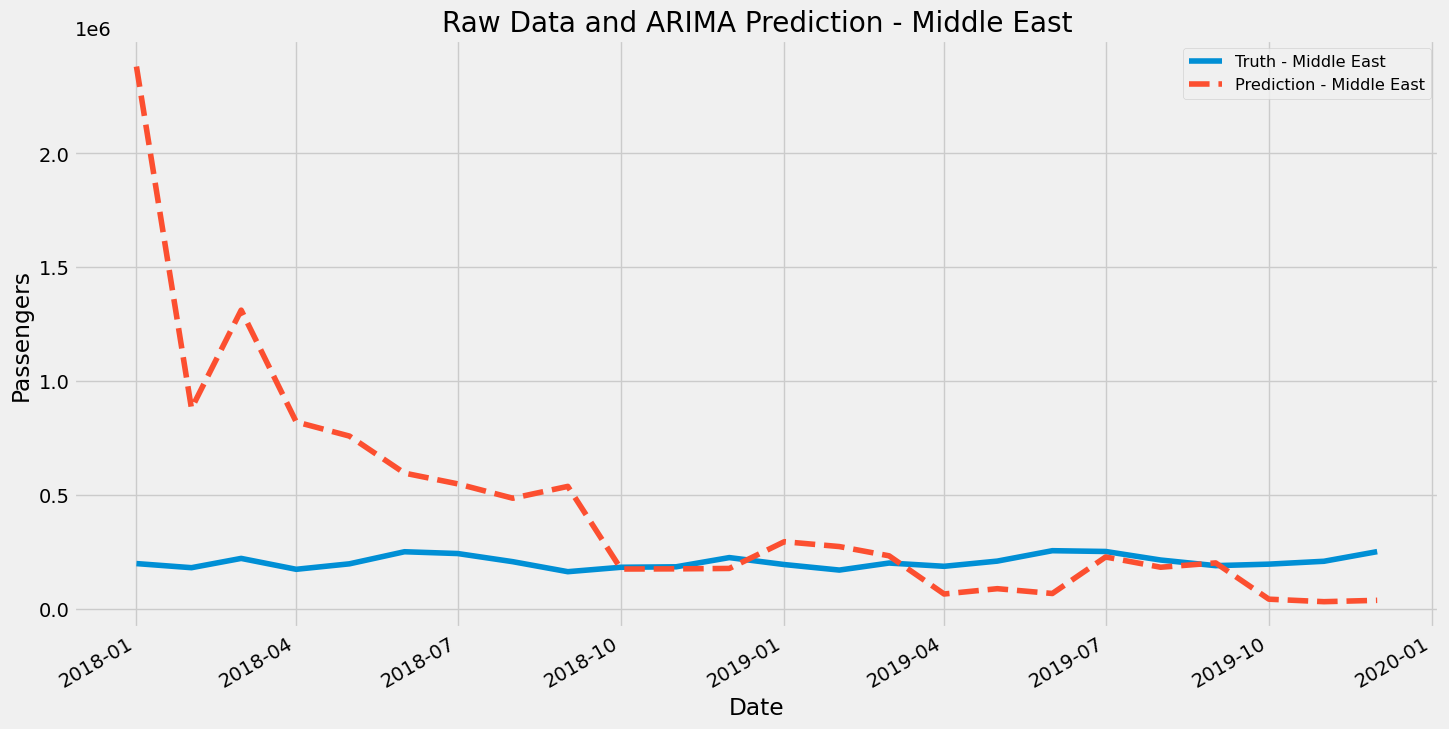

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt, log, pi
import matplotlib.pyplot as plt

# Set display format for floating-point numbers
pd.options.display.float_format = '{:.6f}'.format

regions = test_data['Regions'].unique()

metrics = []
all_predictions = []

for region in regions:
    region_train_data = train_data[train_data['Regions'] == region]
    region_test_data = test_data[test_data['Regions'] == region]

    history = region_train_data['Passengers'].tolist()
    predictions = list()

    # walk-forward validation
    for t in range(len(region_test_data)):
        model = ARIMA(history, order=(1,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = region_test_data.iloc[t]['Passengers']
        history.append(obs)

    # Store predictions in the main list
    all_predictions.extend(predictions)

    # evaluate forecasts
    actual = region_test_data['Passengers'].values
    predicted = np.array(predictions)

    # RMSE
    mse = np.mean((actual - predicted) ** 2)
    rmse = sqrt(mse)

    # MAE
    mae = np.mean(np.abs(actual - predicted))

    # R²
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    # Calculate AIC and BIC
    n = len(actual)
    k = 3  # Number of parameters in ARIMA(1,1,1) including constant term
    residuals = actual - predicted
    sigma2 = np.var(residuals)
    log_likelihood = -n / 2 * (log(2 * pi) + log(sigma2) + 1)
    aic = 2 * k - 2 * log_likelihood
    bic = k * log(n) - 2 * log_likelihood

    # Calculate NRMSE using mean
    mean_val = np.mean(actual)
    nrmse = rmse / mean_val

    # Print the mean value for verification
    print(f"Region: {region}, Mean: {mean_val:.6f}, RMSE: {rmse:.6f}, NRMSE: {nrmse:.6f}")

    # Store metrics for the region
    metrics.append({
        'Region': region,
        'Model': 'ARIMA(1,1,1)',
        'RMSE': rmse,
        'NRMSE': nrmse,
        'MAE': mae,
        'R^2': r2,
        'AIC': aic,
        'BIC': bic,
        'Mean': mean_val  # Add mean value to the metrics
    })

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics in tabular format
print(metrics_df)

# Add predictions to test_data
test_data['prediction'] = all_predictions

# Plot predictions for each region
for region in regions:
    region_data = test_data[test_data['Regions'] == region]

    plt.figure(figsize=(15, 8))
    plt.plot(region_data['Date'], region_data['Passengers'], label=f'Truth - {region}')
    plt.plot(region_data['Date'], region_data['prediction'], linestyle='--', label=f'Prediction - {region}')

    plt.title(f'Raw Data and ARIMA Prediction - {region}')
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.legend(loc='upper right', fontsize='small')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.gcf().autofmt_xdate()
    plt.show()

# Machine Learning Algorithms
- XGBoost
- Random Forest

### Create the Model

In [ ]:
train = create_features(train_data)
test = create_features(test_data)


train = pd.get_dummies(train, columns=['Regions'])
test = pd.get_dummies(test, columns=['Regions'])


FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year'] + \
           [col for col in train.columns if 'Regions_' in col]

TARGET = 'Passengers'


X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


### Using the XGBoost

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:501260.90383	validation_1-rmse:674207.90211
[100]	validation_0-rmse:213147.72935	validation_1-rmse:376704.49299
[200]	validation_0-rmse:112930.84981	validation_1-rmse:241828.80790
[300]	validation_0-rmse:78370.03330	validation_1-rmse:185650.43711
[400]	validation_0-rmse:63964.36826	validation_1-rmse:160881.53814


/Users/chinwe/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:28:57] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[500]	validation_0-rmse:55614.56480	validation_1-rmse:146493.09532
[600]	validation_0-rmse:48768.89349	validation_1-rmse:136175.39443
[700]	validation_0-rmse:44301.20420	validation_1-rmse:129368.77021
[800]	validation_0-rmse:40759.17040	validation_1-rmse:124295.68603
[900]	validation_0-rmse:37632.40075	validation_1-rmse:120581.59527
[999]	validation_0-rmse:34954.49871	validation_1-rmse:117383.98125


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

### Feature Importance

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Results

## Forecast on Test Data

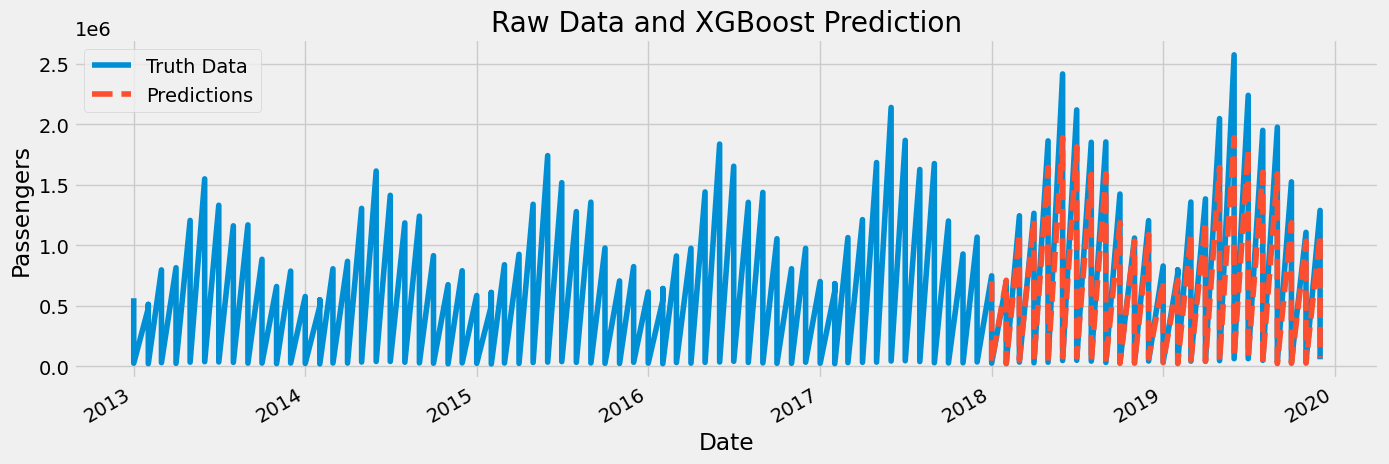

In [ ]:
test['prediction'] = reg.predict(X_test)

new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

ax = new_pre_copy_new.plot(x='Date', y='Passengers', figsize=(15, 5), label='Truth Data')
new_pre_copy_new.plot(x='Date', y='prediction', ax=ax, style='--', label='Predictions')

plt.legend()
ax.set_title('Raw Data and XGBoost Prediction')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

### With Regions

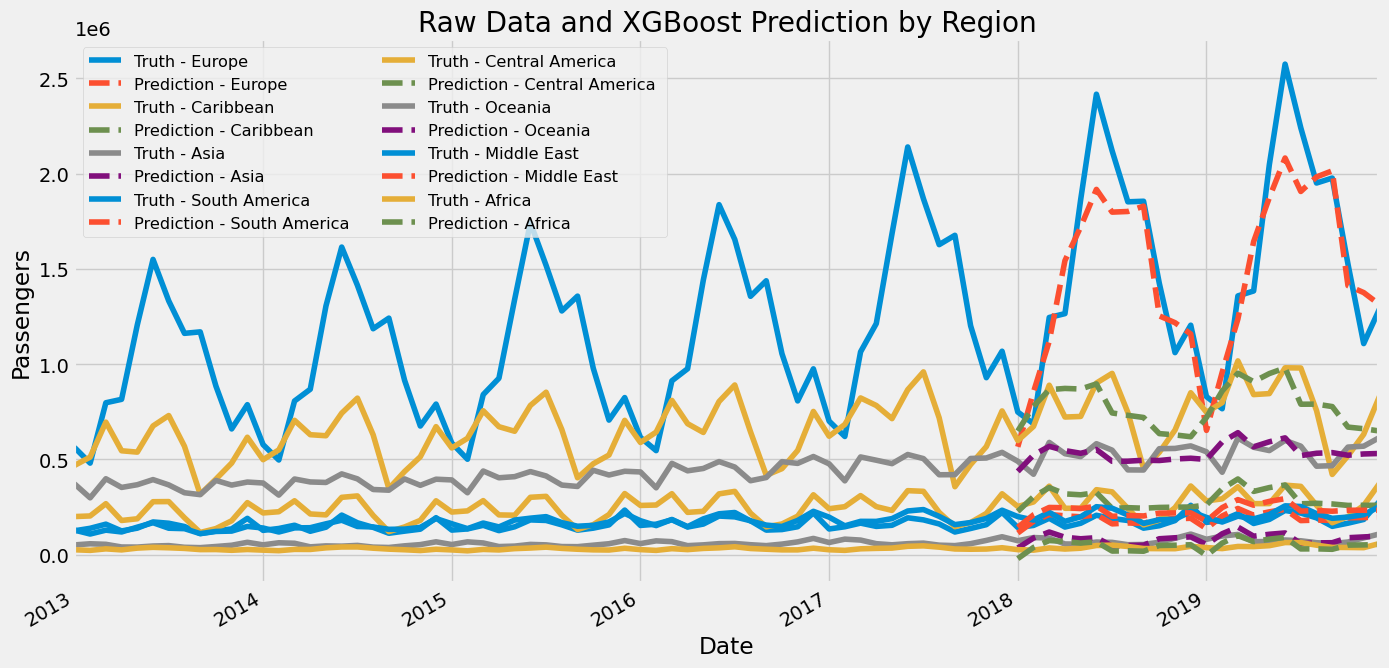

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]
    region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
    region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')
plt.legend(loc='upper left', fontsize='small', ncol=2)
ax.set_title('Raw Data and XGBoost Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

### Score (RMSE)

In [ ]:
score = np.sqrt(mean_squared_error(test['Passengers'], test['prediction']))
print(f'XGBoost RMSE Score on Test set: {score:0.2f}')
print(f'XGBoost R2 Score on Test set: {r2_score(test["Passengers"], test["prediction"]):0.2f}')
print(f'XGBoost MAE Score on Test set: {mean_absolute_error(test["Passengers"], test["prediction"]):0.2f}')

XGBoost RMSE Score on Test set: 117383.98
XGBoost R2 Score on Test set: 0.95
XGBoost MAE Score on Test set: 63896.26


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Assuming train and test data are already prepared as per your provided code

# Fit the XGBoost model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

# Make predictions
test['prediction'] = reg.predict(X_test)

# Calculate RSS
rss = np.sum((test['Passengers'] - test['prediction']) ** 2)

# Number of data points
n = len(test)

# Estimate variance
sigma2 = rss / n

# Calculate log-likelihood
log_likelihood = -n / 2 * (np.log(2 * np.pi * sigma2) + 1)

# Number of parameters (k)
# For simplicity, we assume each tree has a fixed number of parameters
# Here, we approximate k as the number of trees times the number of features
k = reg.n_estimators * X_train.shape[1]

# Calculate AIC
aic = 2 * k - 2 * log_likelihood

# Calculate BIC
bic = k * np.log(n) - 2 * log_likelihood

print(f'XGBoost AIC: {aic:0.2f}')
print(f'XGBoost BIC: {bic:0.2f}')

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(test['Passengers'], test['prediction']))
mae = mean_absolute_error(test['Passengers'], test['prediction'])
r2 = r2_score(test['Passengers'], test['prediction'])

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

[0]	validation_0-rmse:501260.90383	validation_1-rmse:674207.90211
[100]	validation_0-rmse:213147.72935	validation_1-rmse:376704.49299
[200]	validation_0-rmse:112930.84981	validation_1-rmse:241828.80790
[300]	validation_0-rmse:78370.03330	validation_1-rmse:185650.43711
[400]	validation_0-rmse:63964.36826	validation_1-rmse:160881.53814
[500]	validation_0-rmse:55614.56480	validation_1-rmse:146493.09532
[600]	validation_0-rmse:48768.89349	validation_1-rmse:136175.39443


/Users/chinwe/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [23:30:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[700]	validation_0-rmse:44301.20420	validation_1-rmse:129368.77021
[800]	validation_0-rmse:40759.17040	validation_1-rmse:124295.68603
[900]	validation_0-rmse:37632.40075	validation_1-rmse:120581.59527
[999]	validation_0-rmse:34954.49871	validation_1-rmse:117383.98125
XGBoost AIC: 31027.38
XGBoost BIC: 73374.82
RMSE: 117383.98104054491
MAE: 63896.26142374674
R²: 0.9464819125405692


## BIC&AIC  INCLUSIVE

[0]	validation_0-rmse:501260.90383	validation_1-rmse:674207.90211
[100]	validation_0-rmse:213147.72935	validation_1-rmse:376704.49299
[200]	validation_0-rmse:112930.84981	validation_1-rmse:241828.80790
[300]	validation_0-rmse:78370.03330	validation_1-rmse:185650.43711
[400]	validation_0-rmse:63964.36826	validation_1-rmse:160881.53814
[500]	validation_0-rmse:55614.56480	validation_1-rmse:146493.09532
[600]	validation_0-rmse:48768.89349	validation_1-rmse:136175.39443


/Users/chinwe/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:07:55] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[700]	validation_0-rmse:44301.20420	validation_1-rmse:129368.77021
[800]	validation_0-rmse:40759.17040	validation_1-rmse:124295.68603
[900]	validation_0-rmse:37632.40075	validation_1-rmse:120581.59527
[999]	validation_0-rmse:34954.49871	validation_1-rmse:117383.98125


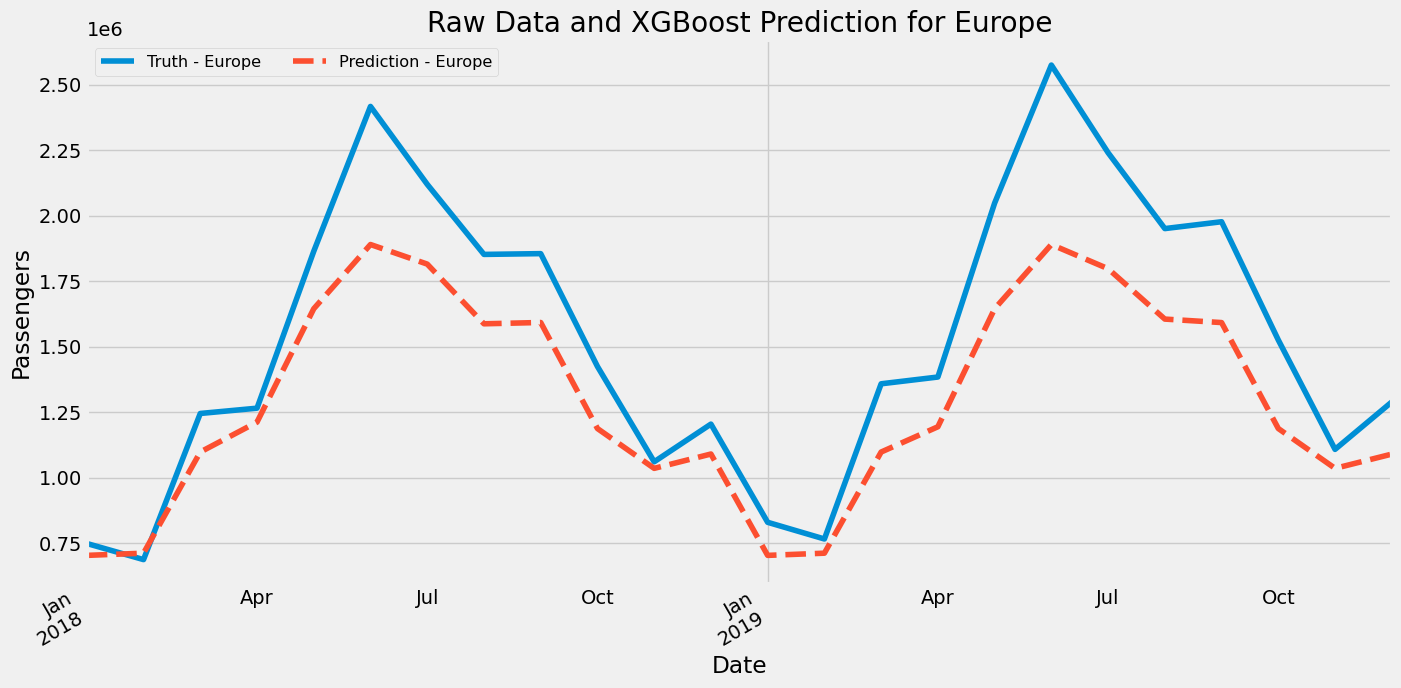

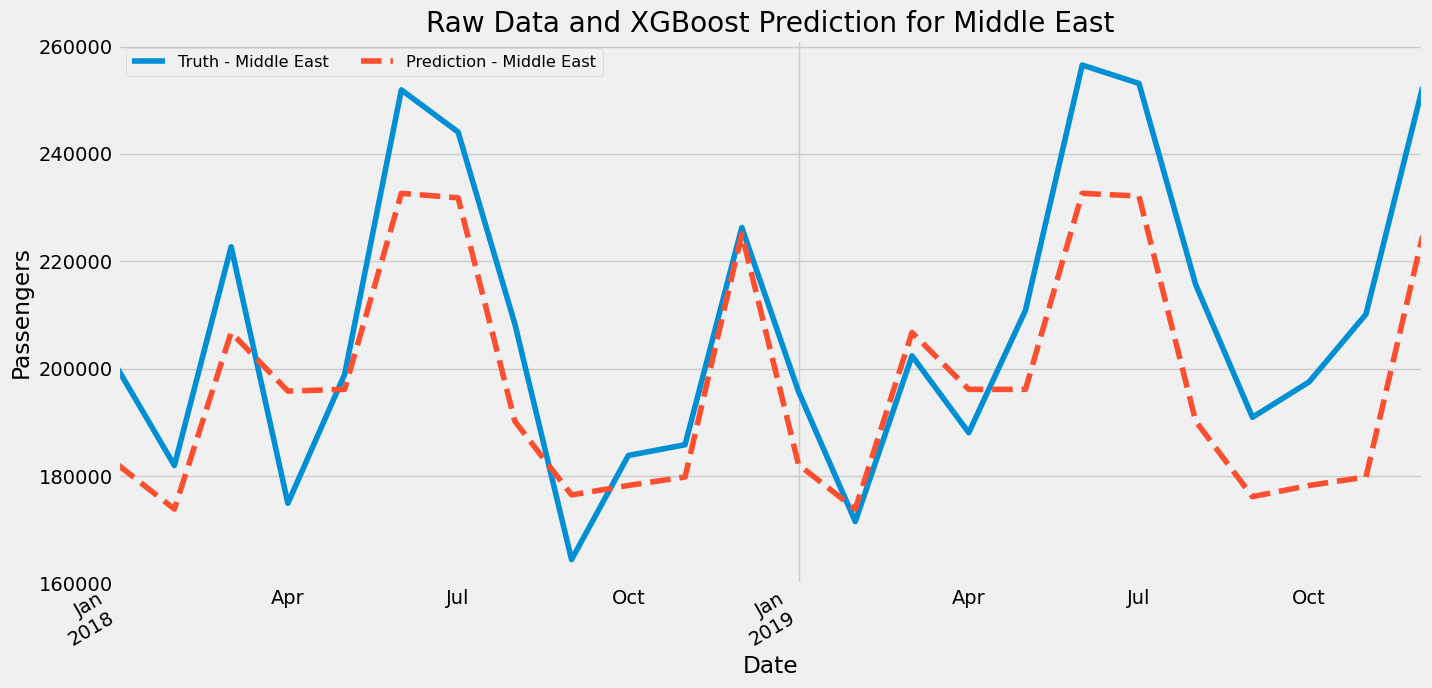

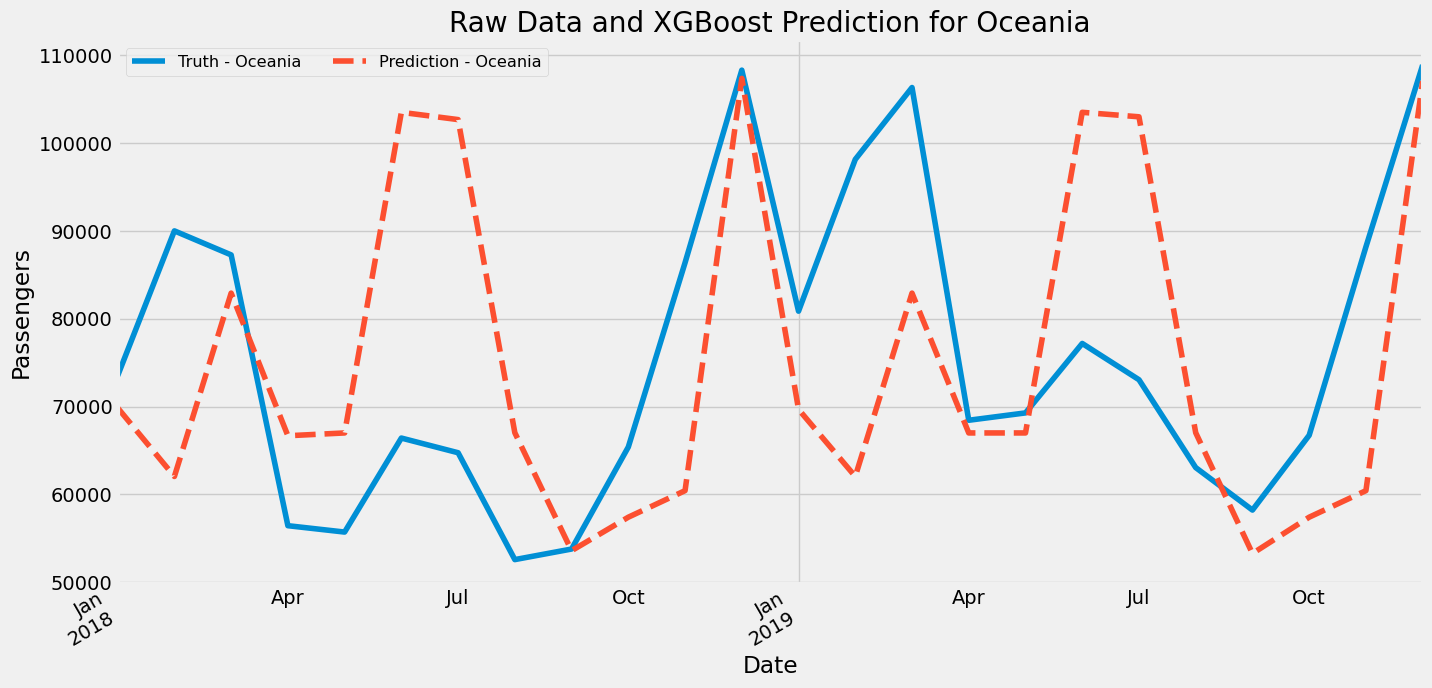

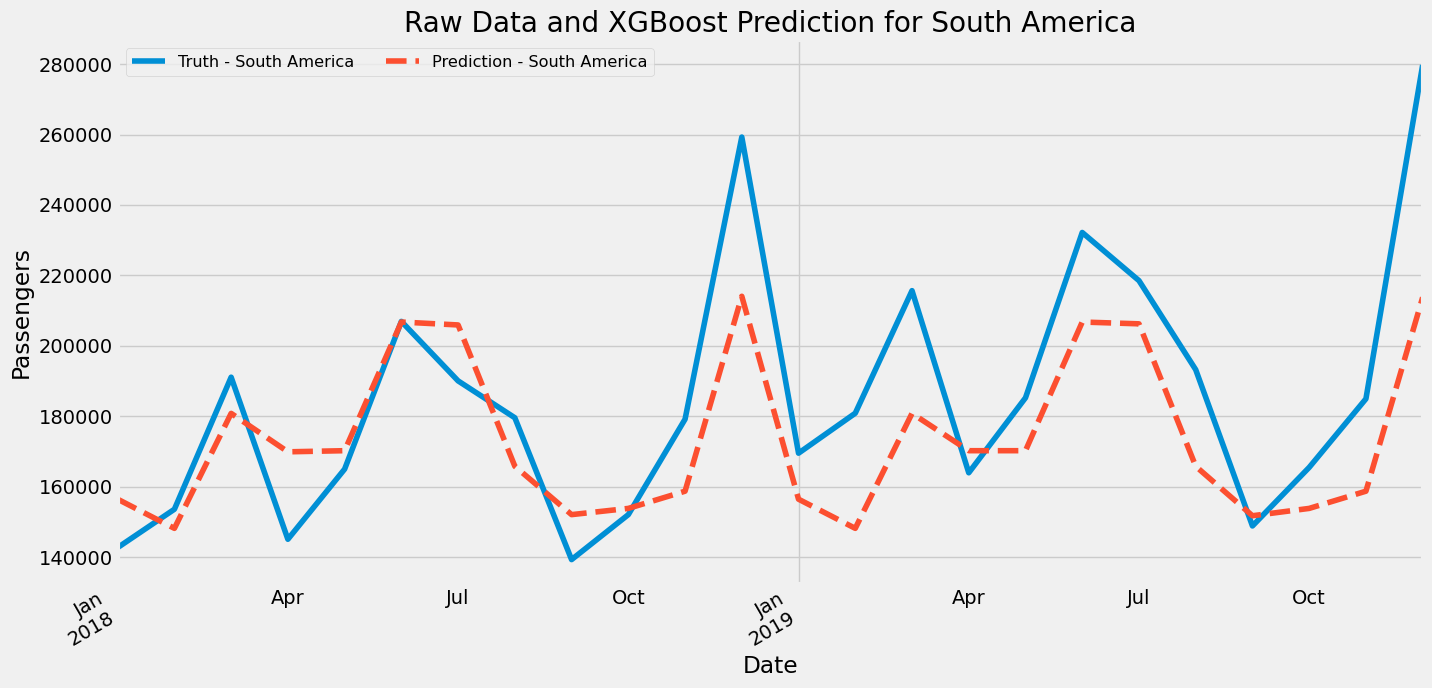

+-----------------+----------+-------+----------+--------+--------+------------------+---------+
| Region          |     RMSE |    R2 |      MAE |    BIC |    AIC |             Mean |   NRMSE |
+=================+==========+=======+==========+========+========+==================+=========+
| Africa          |  13473.1 | -0.62 |  11302.3 | 497.72 | 482.41 |  41000           |    0.34 |
+-----------------+----------+-------+----------+--------+--------+------------------+---------+
| Asia            |  81353.4 | -0.99 |  71266.7 | 584.03 | 568.71 | 533275           |    0.42 |
+-----------------+----------+-------+----------+--------+--------+------------------+---------+
| Caribbean       | 122773   |  0.44 | 101617   | 603.78 | 588.47 | 752919           |    0.21 |
+-----------------+----------+-------+----------+--------+--------+------------------+---------+
| Central America |  50044.9 |  0.39 |  40523.3 | 560.71 | 545.39 | 278673           |    0.23 |
+-----------------+----------+

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from math import sqrt, log
from tabulate import tabulate

# Assuming create_features is a function that processes the data
train = create_features(train_data)
test = create_features(test_data)

# One-hot encode the 'Regions' column
train = pd.get_dummies(train, columns=['Regions'])
test = pd.get_dummies(test, columns=['Regions'])

# Define features and target
FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year'] + \
           [col for col in train.columns if 'Regions_' in col]
TARGET = 'Passengers'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# Train the XGBoost model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

# Make predictions
test['prediction'] = reg.predict(X_test)

# Get unique regions
regions = [col for col in test.columns if 'Regions_' in col]

# Function to calculate metrics manually
def calculate_metrics(actual, predicted, n, k):
    residuals = actual - predicted
    mse = np.mean(residuals ** 2)
    rmse = sqrt(mse)
    mae = np.mean(np.abs(residuals))
    mean_actual = np.mean(actual)
    ss_total = np.sum((actual - mean_actual) ** 2)
    ss_res = np.sum(residuals ** 2)
    r2 = 1 - (ss_res / ss_total)
    bic = n * log(mse) + k * log(n)
    aic = n * log(mse) + 2 * k
    nrmse = rmse / (np.max(actual) - np.min(actual))
    return rmse, r2, mae, bic, aic, mean_actual, nrmse

# Prepare table headers and rows
headers = ["Region", "RMSE", "R2", "MAE", "BIC", "AIC", "Mean", "NRMSE"]
rows = []

# Loop through each region and calculate metrics and plot charts
for region in regions:
    region_name = region.split('_')[1]
    region_data = test[test[region] == 1]

    if not region_data.empty:
        # Calculate metrics
        actual = region_data['Passengers'].values
        predicted = region_data['prediction'].values
        n = len(actual)
        k = len(FEATURES)

        rmse, r2, mae, bic, aic, mean_actual, nrmse = calculate_metrics(actual, predicted, n, k)

        # Append metrics to rows
        rows.append([region_name, f'{rmse:0.2f}', f'{r2:0.2f}', f'{mae:0.2f}', f'{bic:0.2f}', f'{aic:0.2f}', f'{mean_actual:0.2f}', f'{nrmse:0.2f}'])

        # Plot predictions for the region
        fig, ax = plt.subplots(figsize=(15, 8))
        region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region_name}')
        region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region_name}')
        plt.legend(loc='upper left', fontsize='small', ncol=2)
        ax.set_title(f'Raw Data and XGBoost Prediction for {region_name}')
        plt.xlabel('Date')
        plt.ylabel('Passengers')
        plt.grid(True)
        plt.gcf().autofmt_xdate()
        plt.show()

# Print the metrics in a tabular format
print(tabulate(rows, headers, tablefmt="grid"))

### Error Calculation

- Now I want to look at the worst and best predicted days

In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test.groupby(['Date'])['error'].mean().sort_values(ascending=False)

Date
2019-06-01    143320.885742
2018-06-01    108016.135742
2019-07-01    107206.260742
2019-03-01    105643.026855
2019-05-01     84605.779297
2019-12-01     84284.123047
2018-07-01     81749.432617
2019-09-01     72313.105225
2018-03-01     70057.929199
2019-10-01     67416.821777
2018-12-01     64941.791016
2019-08-01     64050.930664
2019-04-01     57218.329590
2018-09-01     51333.858887
2019-01-01     49378.183838
2019-11-01     48501.465088
2018-08-01     46119.133789
2018-10-01     46017.114746
2019-02-01     39825.577148
2018-05-01     38749.970703
2018-11-01     37795.965088
2018-04-01     25349.912598
2018-01-01     24542.213623
2018-02-01     15072.327148
Name: error, dtype: float64

## Random Forest Model

In [ ]:

#Correct code without Regions

# rf = RandomForestRegressor(n_estimators=100, random_state=42)

# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Random Forest RMSE: {rmse}")

# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(test_data['Date'], y_test, label='Actual', linestyle='-', marker='o', color='blue')
# plt.plot(test_data['Date'], y_pred, label='Predicted', linestyle='--', marker='x', color='red')
# plt.xlabel('Date')
# plt.ylabel('Passengers')
# plt.title('Actual vs. Predicted Passengers')
# plt.legend()
# plt.grid(True)
# plt.show()

Random Forest RMSE: 117761.59735485638
Random Forest R2: 0.9461370305773715
Random Forest MAE: 63931.69359375


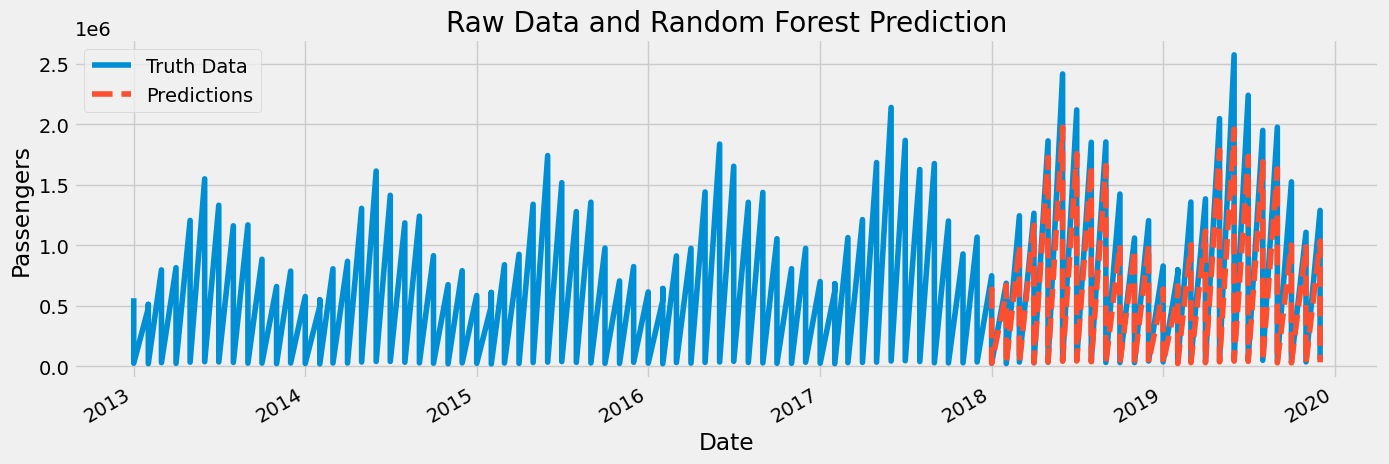

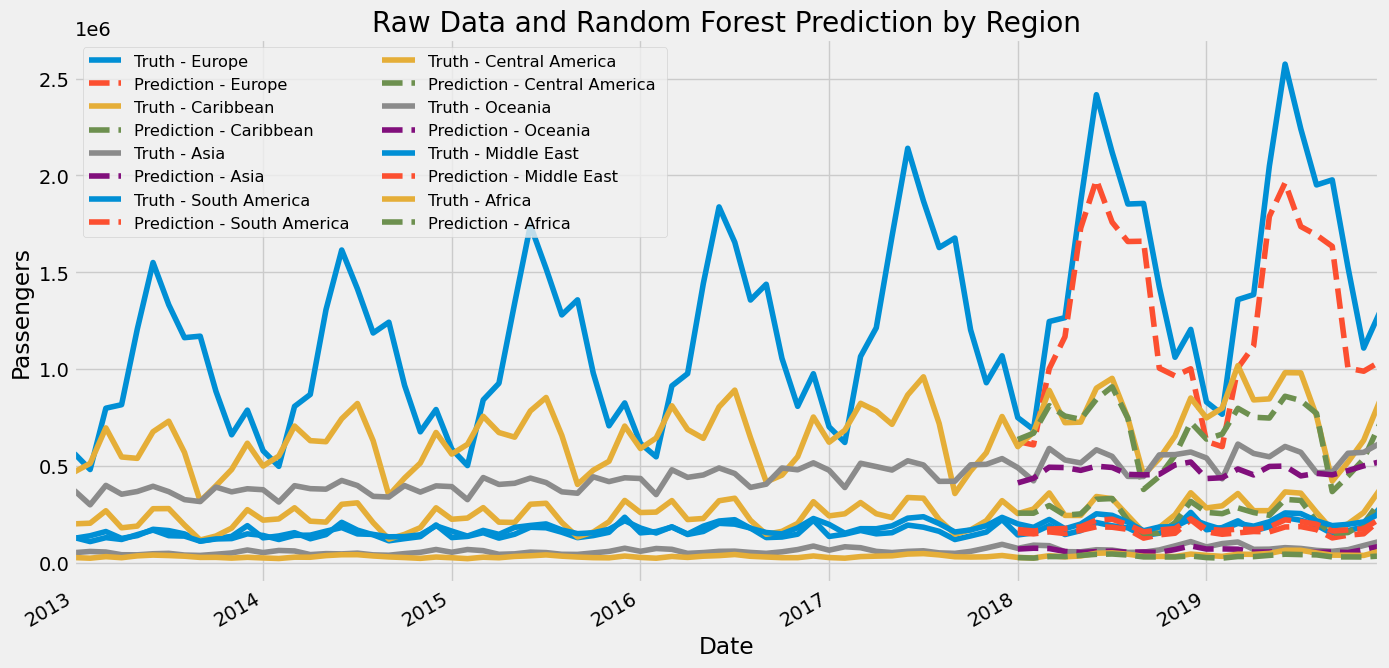

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse}")

#Calculate R2
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R2: {r2}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest MAE: {mae}")

# Merge predictions with the original data
test['prediction'] = y_pred
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Plot overall data and predictions
ax = new_pre_copy_new.plot(x='Date', y='Passengers', figsize=(15, 5), label='Truth Data')
new_pre_copy_new.plot(x='Date', y='prediction', ax=ax, style='--', label='Predictions')

plt.legend()
ax.set_title('Raw Data and Random Forest Prediction')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

# Plot data and predictions by region
fig, ax = plt.subplots(figsize=(15, 8))

for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]
    region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
    region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')

plt.legend(loc='upper left', fontsize='small', ncol=2)
ax.set_title('Raw Data and Random Forest Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

### Random Forest AIC & BIC Included

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming train and test data are already prepared as per your provided code

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse}")

# Calculate R2
r2 = r2_score(y_test, y_pred)
print(f"Random Forest R2: {r2}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest MAE: {mae}")

# Calculate RSS
rss = np.sum((y_test - y_pred) ** 2)

# Number of data points
n = len(y_test)

# Estimate variance
sigma2 = rss / n

# Calculate log-likelihood
log_likelihood = -n / 2 * (np.log(2 * np.pi * sigma2) + 1)

# Number of parameters (k)
# For simplicity, we assume each tree has a fixed number of parameters
# Here, we approximate k as the number of trees times the number of features
k = rf.n_estimators * X_train.shape[1]

# Calculate AIC
aic = 2 * k - 2 * log_likelihood

# Calculate BIC
bic = k * np.log(n) - 2 * log_likelihood

print(f'Random Forest AIC: {aic:0.2f}')
print(f'Random Forest BIC: {bic:0.2f}')

Random Forest RMSE: 117761.59735485638
Random Forest R2: 0.9461370305773715
Random Forest MAE: 63931.69359375
Random Forest AIC: 7628.62
Random Forest BIC: 11863.36


## AIC & BIC INCLUDED

+-----------------+----------+-------------+-----------+------------------+---------+---------+----------+
| Region          |     RMSE |          R2 |       MAE |             Mean |     AIC |     BIC |    NRMSE |
+=================+==========+=============+===========+==================+=========+=========+==========+
| Europe          | 304987   |  0.674786   | 268881    |      1.53298e+06 | 806.145 | 923.951 | 0.19895  |
+-----------------+----------+-------------+-----------+------------------+---------+---------+----------+
| Caribbean       |  95221.4 |  0.662758   |  80707.5  | 752919           | 750.27  | 868.075 | 0.12647  |
+-----------------+----------+-------------+-----------+------------------+---------+---------+----------+
| Asia            |  74971.8 | -0.689511   |  63719.8  | 533275           | 738.794 | 856.599 | 0.140588 |
+-----------------+----------+-------------+-----------+------------------+---------+---------+----------+
| South America   |  29000.9 |  0.321

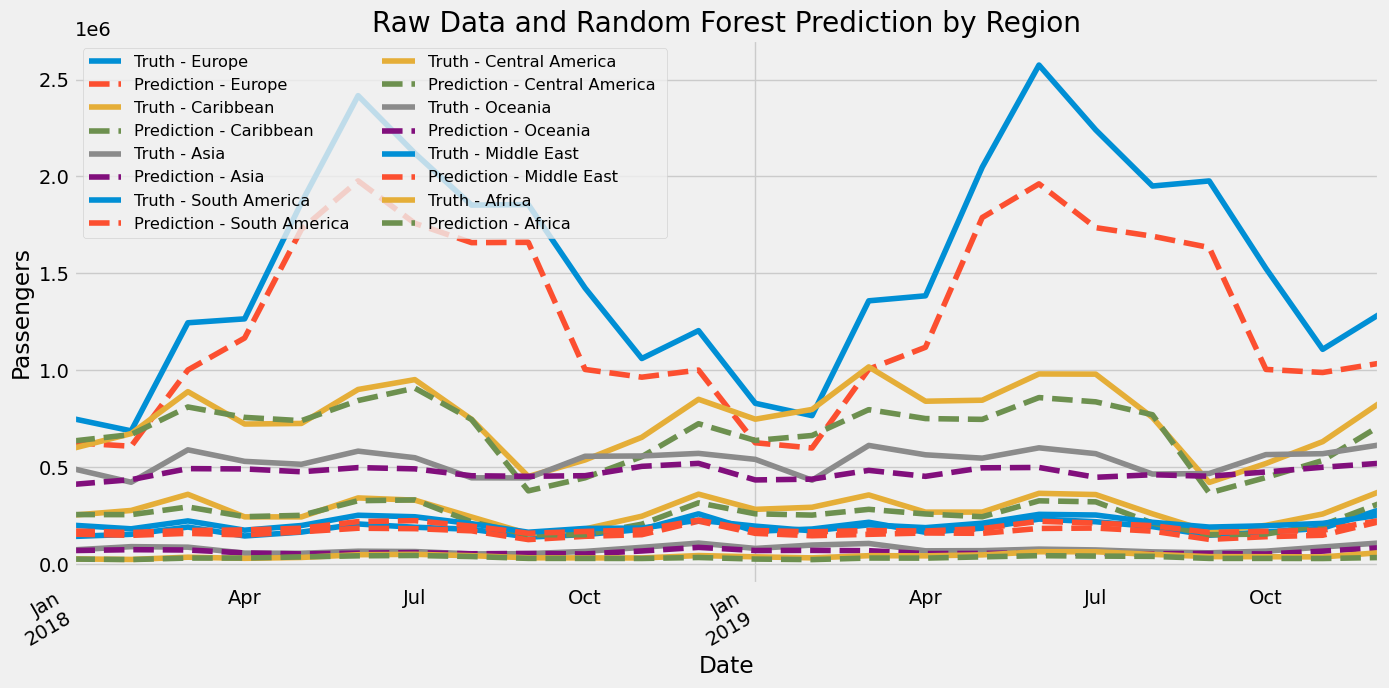

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from math import sqrt, log
from tabulate import tabulate

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Merge predictions with the original data
test['prediction'] = y_pred
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Define functions to calculate metrics manually
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return sqrt(mse)

def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_mean(y_true):
    return np.mean(y_true)

def calculate_aic(y_true, y_pred, num_params):
    resid = y_true - y_pred
    sse = np.sum(resid ** 2)
    aic = 2 * num_params + len(y_true) * log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, num_params):
    resid = y_true - y_pred
    sse = np.sum(resid ** 2)
    bic = num_params * log(len(y_true)) + len(y_true) * log(sse / len(y_true))
    return bic

def calculate_nrmse(y_true, y_pred):
    rmse = calculate_rmse(y_true, y_pred)
    mean_y_true = calculate_mean(y_true)
    return rmse / mean_y_true

# Initialize a list to store metrics for each region
metrics_list = []

# Plot data and predictions by region
fig, ax = plt.subplots(figsize=(15, 8))

for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]

    if not region_data.empty:
        # Ensure there are no NaN values in the actual and predicted columns
        region_data = region_data.dropna(subset=['Passengers', 'prediction'])

        # Calculate metrics for the region
        actual = region_data['Passengers'].values
        predicted = region_data['prediction'].values

        if len(actual) > 0 and len(predicted) > 0:
            rmse = calculate_rmse(actual, predicted)
            r2 = calculate_r2(actual, predicted)
            mae = calculate_mae(actual, predicted)
            mean = calculate_mean(actual)
            num_params = rf.n_estimators  # Number of parameters in the model
            aic = calculate_aic(actual, predicted, num_params)
            bic = calculate_bic(actual, predicted, num_params)
            nrmse = calculate_nrmse(actual, predicted)

            # Append metrics to the list
            metrics_list.append([
                region,
                rmse,
                r2,
                mae,
                mean,
                aic,
                bic,
                nrmse
            ])

            # Plot predictions for the region
            region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
            region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')

# Define headers for the table
headers = ['Region', 'RMSE', 'R2', 'MAE', 'Mean', 'AIC', 'BIC', 'NRMSE']

# Print the metrics table using tabulate
print(tabulate(metrics_list, headers=headers, tablefmt='grid'))

plt.legend(loc='upper left', fontsize='small', ncol=2)
ax.set_title('Raw Data and Random Forest Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

## Deep Learning Approaches
- LSTM
- GRU

## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_train and y_test are NumPy arrays
y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# 1. Preprocess Data: Scale features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train_scaled = target_scaler.fit_transform(y_train_array.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test_array.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features] for LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 2. Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=200, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), verbose=2, shuffle=False)

# 3. Make Predictions
y_pred_scaled = model.predict(X_test_reshaped)

y_test_inv = target_scaler.inverse_transform(y_test_scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

test['prediction'] = y_pred_inv
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs LSTM Predicted Passengers')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot data and predictions by region
fig, ax = plt.subplots(figsize=(15, 8))

for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]
    region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
    region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')

plt.legend(loc='upper left', fontsize='small', ncol=2)
ax.set_title('Raw Data and LSTM Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

Epoch 1/200


/Users/chinwe/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 1s - 74ms/step - loss: 0.0421 - val_loss: 0.0642
Epoch 2/200
15/15 - 0s - 2ms/step - loss: 0.0280 - val_loss: 0.0496
Epoch 3/200
15/15 - 0s - 7ms/step - loss: 0.0226 - val_loss: 0.0413
Epoch 4/200
15/15 - 0s - 3ms/step - loss: 0.0159 - val_loss: 0.0297
Epoch 5/200
15/15 - 0s - 2ms/step - loss: 0.0091 - val_loss: 0.0177
Epoch 6/200
15/15 - 0s - 2ms/step - loss: 0.0057 - val_loss: 0.0120
Epoch 7/200
15/15 - 0s - 2ms/step - loss: 0.0052 - val_loss: 0.0108
Epoch 8/200
15/15 - 0s - 2ms/step - loss: 0.0050 - val_loss: 0.0109
Epoch 9/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0109
Epoch 10/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0107
Epoch 11/200
15/15 - 0s - 2ms/step - loss: 0.0047 - val_loss: 0.0106
Epoch 12/200
15/15 - 0s - 2ms/step - loss: 0.0047 - val_loss: 0.0106
Epoch 13/200
15/15 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0106
Epoch 14/200
15/15 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0105
Epoch 15/200
15/15 - 0s - 3ms/step - loss: 0.0046 - va

### LSTM AIC & BIC Included

Epoch 1/200


/Users/chinwe/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 1s - 63ms/step - loss: 0.0375 - val_loss: 0.0584
Epoch 2/200
15/15 - 0s - 2ms/step - loss: 0.0246 - val_loss: 0.0447
Epoch 3/200
15/15 - 0s - 2ms/step - loss: 0.0188 - val_loss: 0.0365
Epoch 4/200
15/15 - 0s - 2ms/step - loss: 0.0118 - val_loss: 0.0247
Epoch 5/200
15/15 - 0s - 2ms/step - loss: 0.0064 - val_loss: 0.0151
Epoch 6/200
15/15 - 0s - 2ms/step - loss: 0.0050 - val_loss: 0.0118
Epoch 7/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0115
Epoch 8/200
15/15 - 0s - 2ms/step - loss: 0.0047 - val_loss: 0.0115
Epoch 9/200
15/15 - 0s - 3ms/step - loss: 0.0047 - val_loss: 0.0113
Epoch 10/200
15/15 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0111
Epoch 11/200
15/15 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0111
Epoch 12/200
15/15 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0110
Epoch 13/200
15/15 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0109
Epoch 14/200
15/15 - 0s - 2ms/step - loss: 0.0045 - val_loss: 0.0109
Epoch 15/200
15/15 - 0s - 2ms/step - loss: 0.0045 - va

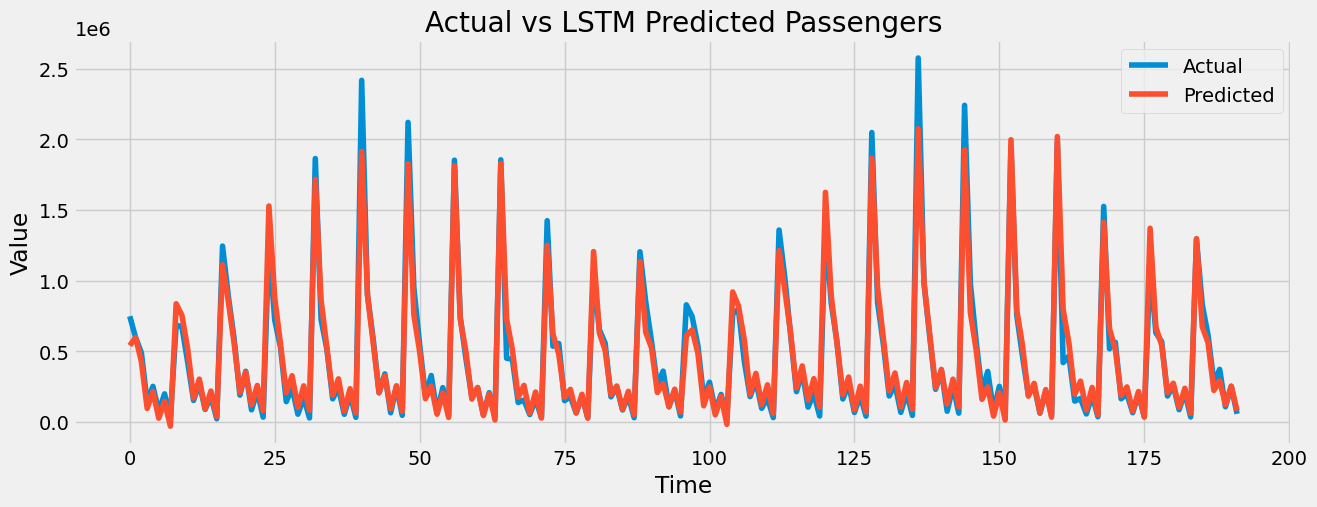

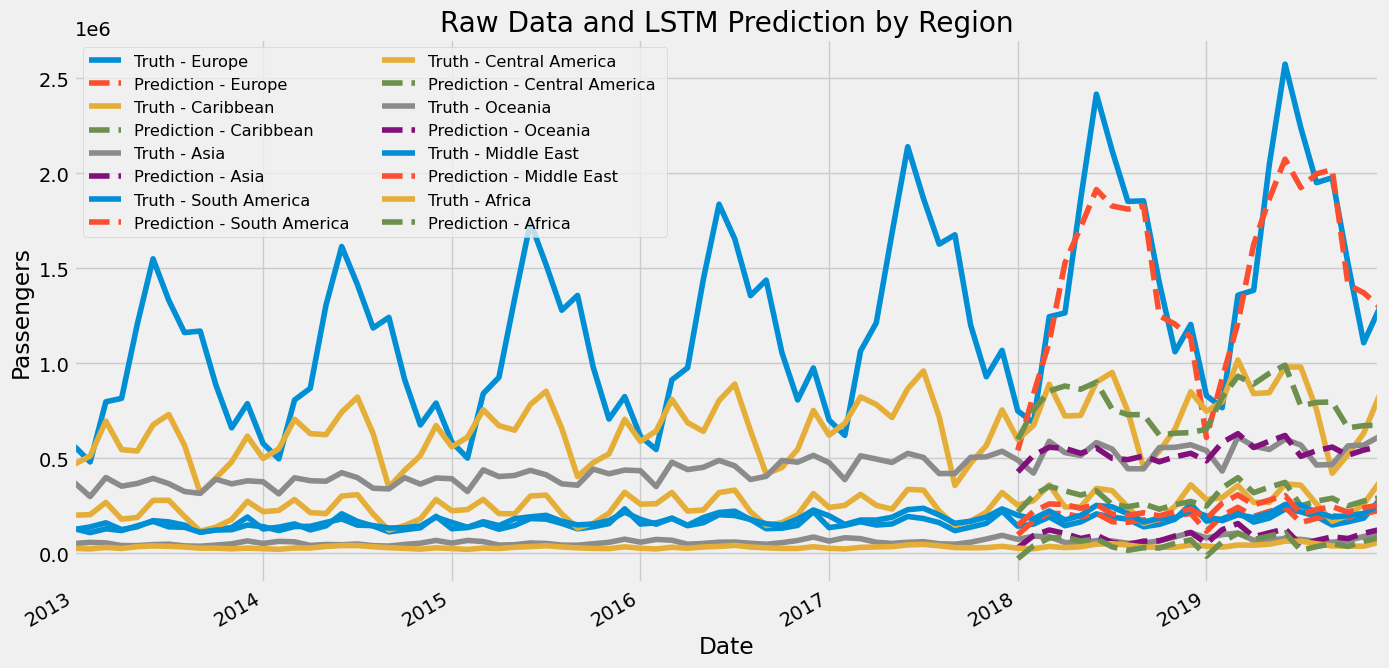

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_train and y_test are NumPy arrays
y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# 1. Preprocess Data: Scale features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train_scaled = target_scaler.fit_transform(y_train_array.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test_array.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features] for LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 2. Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=200, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), verbose=2, shuffle=False)

# 3. Make Predictions
y_pred_scaled = model.predict(X_test_reshaped)

y_test_inv = target_scaler.inverse_transform(y_test_scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Calculate RSS
rss = np.sum((y_test_inv - y_pred_inv) ** 2)

# Number of data points
n = len(y_test_inv)

# Estimate variance
sigma2 = rss / n

# Calculate log-likelihood
log_likelihood = -n / 2 * (np.log(2 * np.pi * sigma2) + 1)

# Number of parameters (k)
# For LSTM, k is the total number of trainable parameters in the model
k = model.count_params()

# Calculate AIC
aic = 2 * k - 2 * log_likelihood

# Calculate BIC
bic = k * np.log(n) - 2 * log_likelihood

print(f'LSTM AIC: {aic:0.2f}')
print(f'LSTM BIC: {bic:0.2f}')

test['prediction'] = y_pred_inv
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs LSTM Predicted Passengers')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot data and predictions by region
fig, ax = plt.subplots(figsize=(15, 8))

for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]
    region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
    region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')

plt.legend(loc='upper left', fontsize='small', ncol=2)
ax.set_title('Raw Data and LSTM Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
lmean_actual = 375939.8
lrmse = 103053.31073488624

lrelative_rmse = (lrmse / lmean_actual) * 100
print(f'Relative RMSE: {lrelative_rmse:.2f}%')

Relative RMSE: 27.41%


## Full code Tablulated Metrics

/Users/chinwe/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
15/15 - 3s - 167ms/step - loss: 0.0415 - val_loss: 0.0642
Epoch 2/200
15/15 - 0s - 2ms/step - loss: 0.0273 - val_loss: 0.0493
Epoch 3/200
15/15 - 0s - 2ms/step - loss: 0.0220 - val_loss: 0.0414
Epoch 4/200
15/15 - 0s - 2ms/step - loss: 0.0153 - val_loss: 0.0302
Epoch 5/200
15/15 - 0s - 2ms/step - loss: 0.0088 - val_loss: 0.0185
Epoch 6/200
15/15 - 0s - 2ms/step - loss: 0.0055 - val_loss: 0.0125
Epoch 7/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0111
Epoch 8/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0111
Epoch 9/200
15/15 - 0s - 2ms/step - loss: 0.0047 - val_loss: 0.0110
Epoch 10/200
15/15 - 0s - 2ms/step - loss: 0.0047 - val_loss: 0.0109
Epoch 11/200
15/15 - 0s - 2ms/step - loss: 0.0046 - val_loss: 0.0109
Epoch 12/200
15/15 - 0s - 10ms/step - loss: 0.0046 - val_loss: 0.0108
Epoch 13/200
15/15 - 0s - 3ms/step - loss: 0.0046 - val_loss: 0.0108
Epoch 14/200
15/15 - 0s - 3ms/step - loss: 0.0046 - val_loss: 0.0107
Epoch 15/200
15/15 - 0s - 3ms/step - los

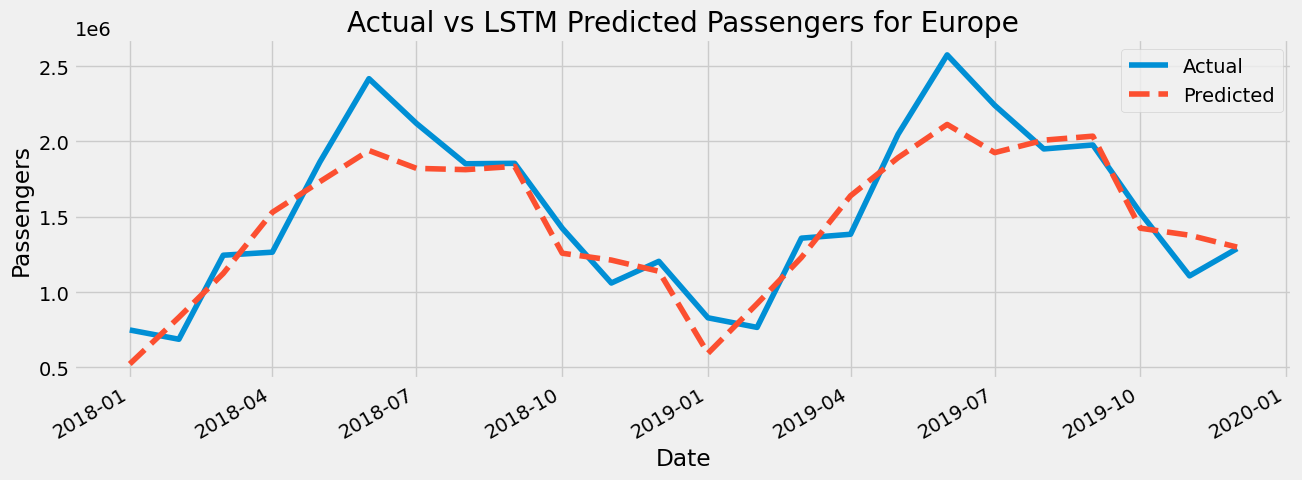

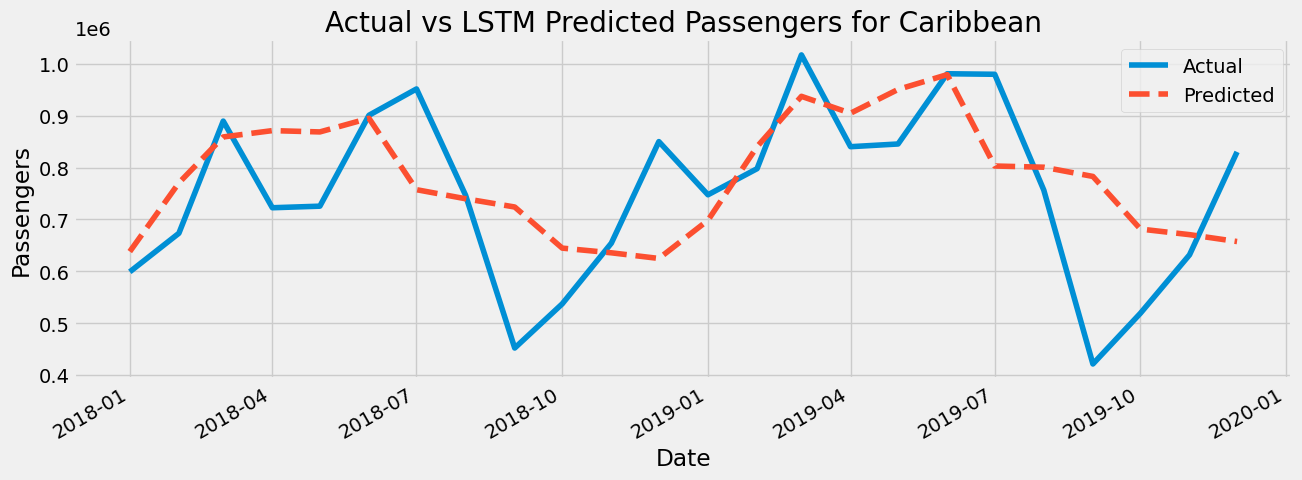

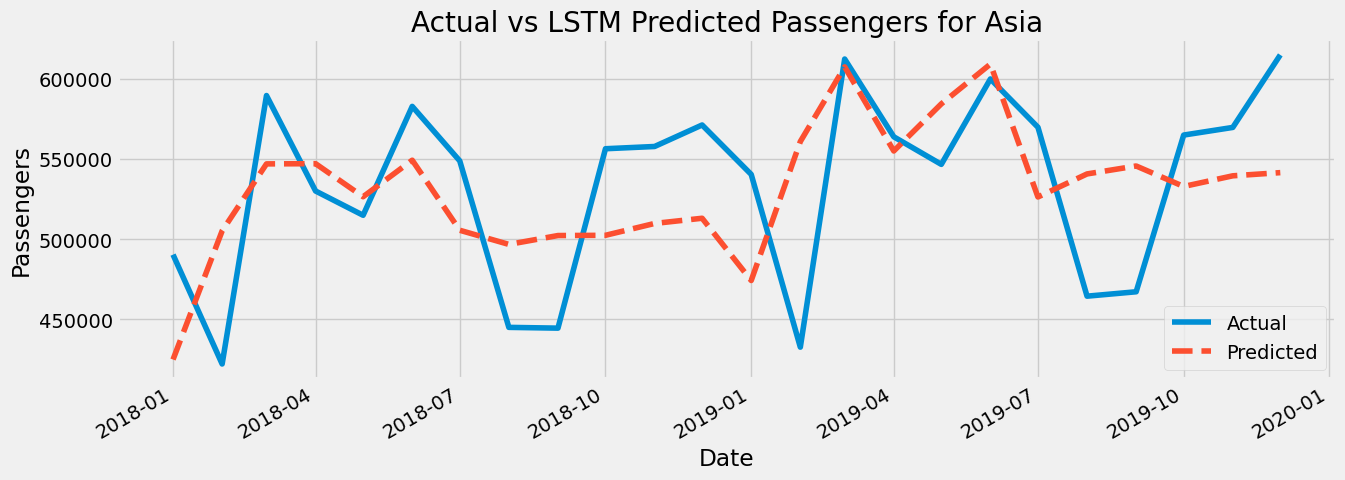

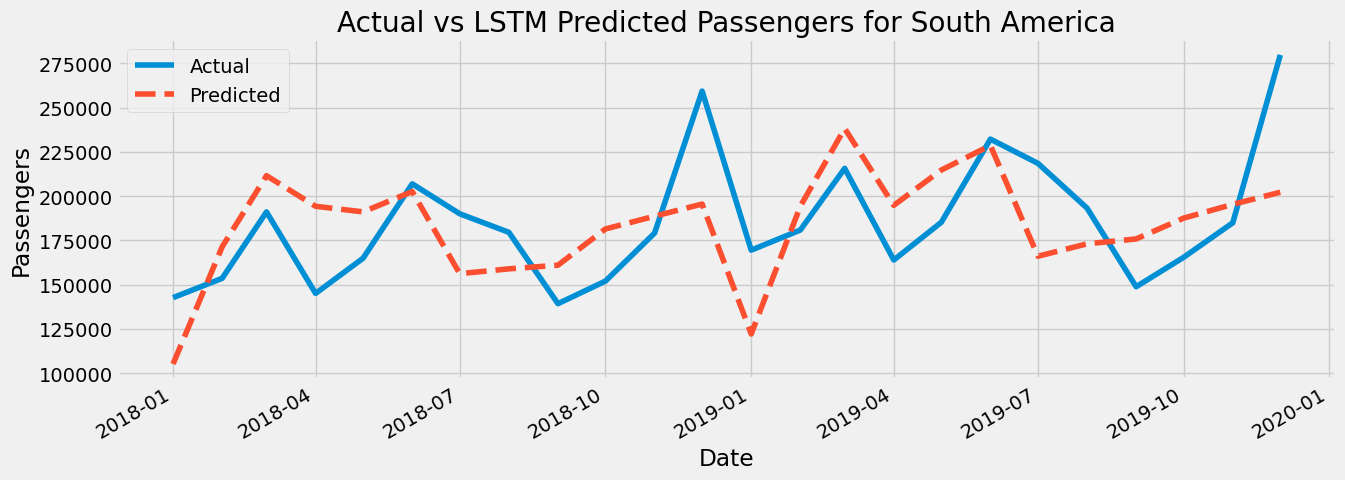

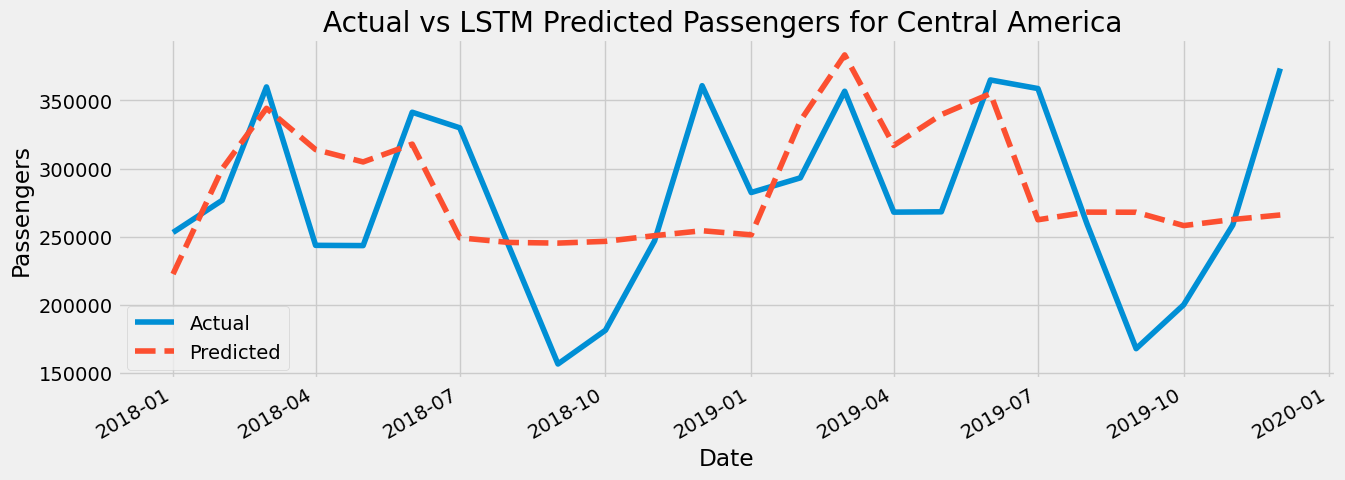

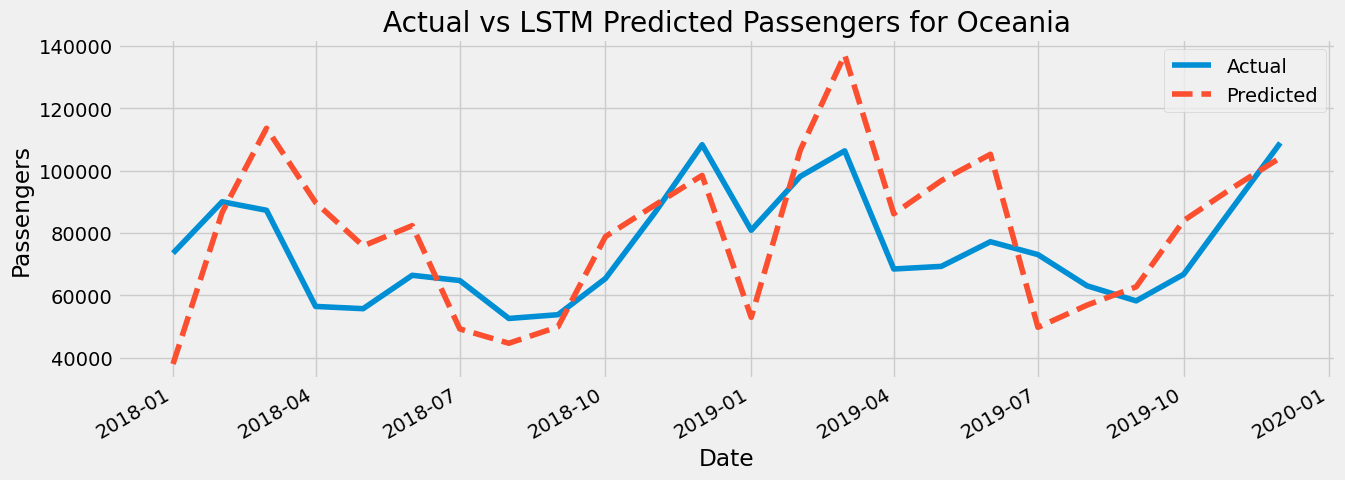

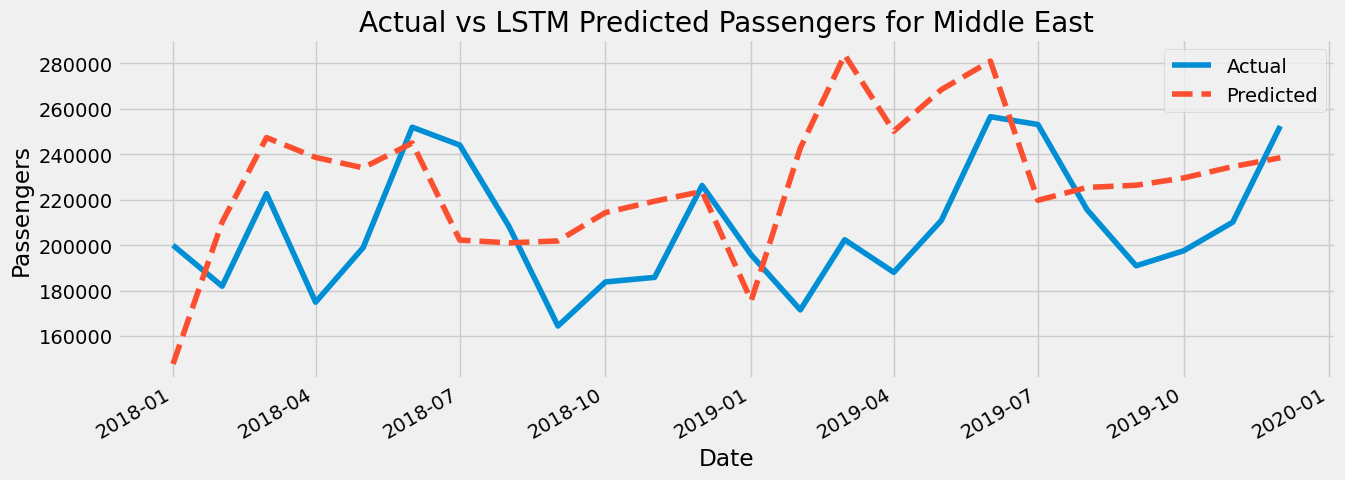

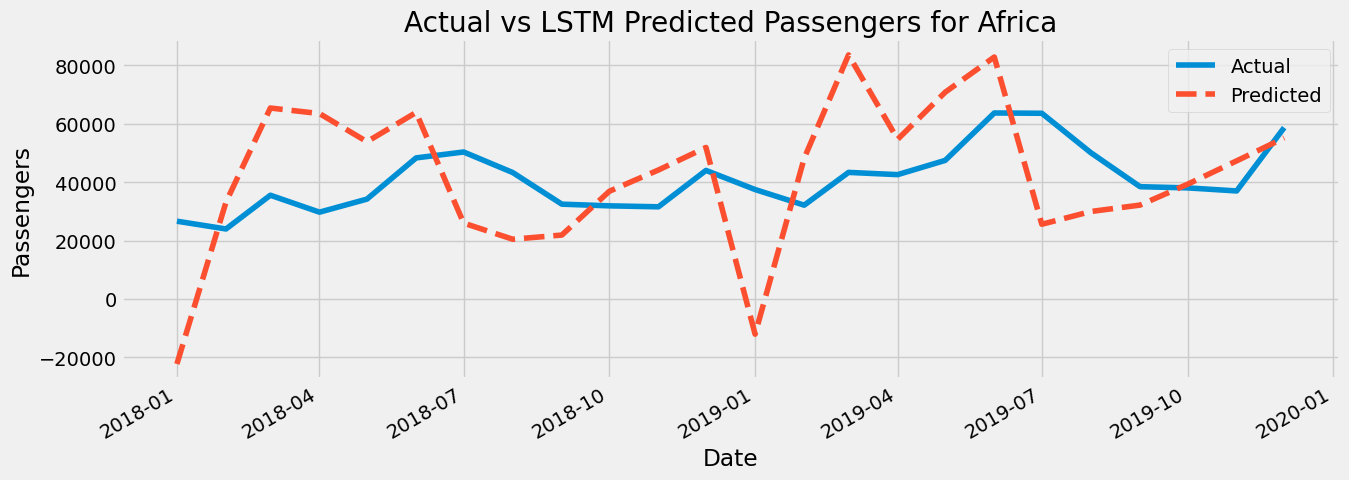

+-----------------+----------+------------+----------+------------------+---------+--------+----------+
| Region          |     RMSE |         R2 |      MAE |             Mean |     AIC |    BIC |    NRMSE |
+=================+==========+============+==========+==================+=========+========+==========+
| Europe          | 217410   |  0.834742  | 179586   |      1.53298e+06 | 66691.9 | 105628 | 0.115198 |
+-----------------+----------+------------+----------+------------------+---------+--------+----------+
| Caribbean       | 140938   |  0.2612    | 107875   | 752919           | 66671.1 | 105607 | 0.236425 |
+-----------------+----------+------------+----------+------------------+---------+--------+----------+
| Asia            |  55692.1 |  0.067707  |  48062.9 | 533275           | 66626.5 | 105562 | 0.289307 |
+-----------------+----------+------------+----------+------------------+---------+--------+----------+
| South America   |  33881.8 |  0.0744214 |  28779.8 | 185103   

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log
from tabulate import tabulate

# Ensure y_train and y_test are NumPy arrays
y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# 1. Preprocess Data: Scale features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train_scaled = target_scaler.fit_transform(y_train_array.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test_array.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features] for LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 2. Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=200, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), verbose=2, shuffle=False)

# 3. Make Predictions
y_pred_scaled = model.predict(X_test_reshaped)

y_test_inv = target_scaler.inverse_transform(y_test_scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Define functions to calculate metrics manually
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return sqrt(mse)

def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_mean(y_true):
    return np.mean(y_true)

def calculate_aic(y_true, y_pred, num_params):
    resid = y_true - y_pred
    sse = np.sum(resid ** 2)
    aic = 2 * num_params + len(y_true) * log(sse / len(y_true))
    return aic

def calculate_bic(y_true, y_pred, num_params):
    resid = y_true - y_pred
    sse = np.sum(resid ** 2)
    bic = num_params * log(len(y_true)) + len(y_true) * log(sse / len(y_true))
    return bic

def calculate_nrmse(y_true, y_pred):
    rmse = calculate_rmse(y_true, y_pred)
    return rmse / (np.max(y_true) - np.min(y_true))

# Initialize a list to store metrics for each region
metrics_list = []

# Merge predictions with the original data
test['prediction'] = y_pred_inv
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Plot data and predictions by region
for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]

    if not region_data.empty:
        # Ensure there are no NaN values in the actual and predicted columns
        region_data = region_data.dropna(subset=['Passengers', 'prediction'])

        # Calculate metrics for the region
        actual = region_data['Passengers'].values
        predicted = region_data['prediction'].values

        if len(actual) > 0 and len(predicted) > 0:
            rmse = calculate_rmse(actual, predicted)
            r2 = calculate_r2(actual, predicted)
            mae = calculate_mae(actual, predicted)
            mean = calculate_mean(actual)
            num_params = model.count_params()  # Number of parameters in the model
            aic = calculate_aic(actual, predicted, num_params)
            bic = calculate_bic(actual, predicted, num_params)
            nrmse = calculate_nrmse(actual, predicted)

            # Append metrics to the list
            metrics_list.append([
                region,
                rmse,
                r2,
                mae,
                mean,
                aic,
                bic,
                nrmse
            ])

            # Plot predictions for the region
            plt.figure(figsize=(14, 5))
            plt.plot(region_data['Date'], actual, label='Actual')
            plt.plot(region_data['Date'], predicted, label='Predicted', linestyle='--')
            plt.title(f'Actual vs LSTM Predicted Passengers for {region}')
            plt.xlabel('Date')
            plt.ylabel('Passengers')
            plt.legend()
            plt.grid(True)
            plt.gcf().autofmt_xdate()
            plt.show()

# Define headers for the table
headers = ['Region', 'RMSE', 'R2', 'MAE', 'Mean', 'AIC', 'BIC', 'NRMSE']

# Print the metrics table using tabulate
print(tabulate(metrics_list, headers=headers, tablefmt='grid'))

## GRU Model Predictions

## Full code Tablulated Metrics

Epoch 1/200


/Users/chinwe/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 1s - 88ms/step - loss: 0.0307 - val_loss: 0.0447
Epoch 2/200
15/15 - 0s - 4ms/step - loss: 0.0187 - val_loss: 0.0363
Epoch 3/200
15/15 - 0s - 2ms/step - loss: 0.0090 - val_loss: 0.0193
Epoch 4/200
15/15 - 0s - 2ms/step - loss: 0.0054 - val_loss: 0.0130
Epoch 5/200
15/15 - 0s - 2ms/step - loss: 0.0050 - val_loss: 0.0121
Epoch 6/200
15/15 - 0s - 2ms/step - loss: 0.0052 - val_loss: 0.0126
Epoch 7/200
15/15 - 0s - 2ms/step - loss: 0.0050 - val_loss: 0.0127
Epoch 8/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0127
Epoch 9/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0126
Epoch 10/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0125
Epoch 11/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0124
Epoch 12/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0123
Epoch 13/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0122
Epoch 14/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0121
Epoch 15/200
15/15 - 0s - 2ms/step - loss: 0.0048 - va

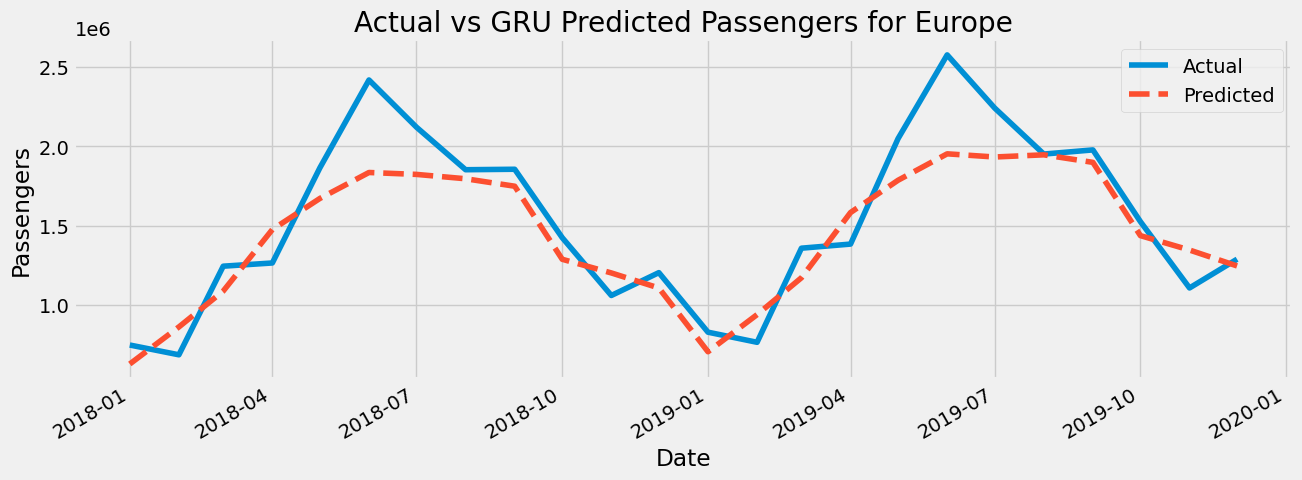

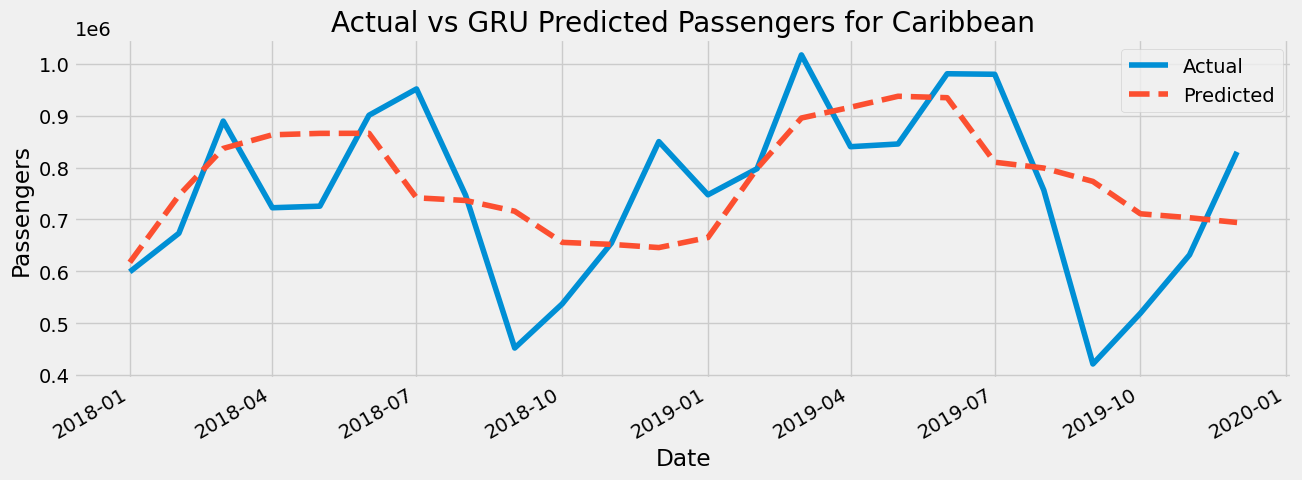

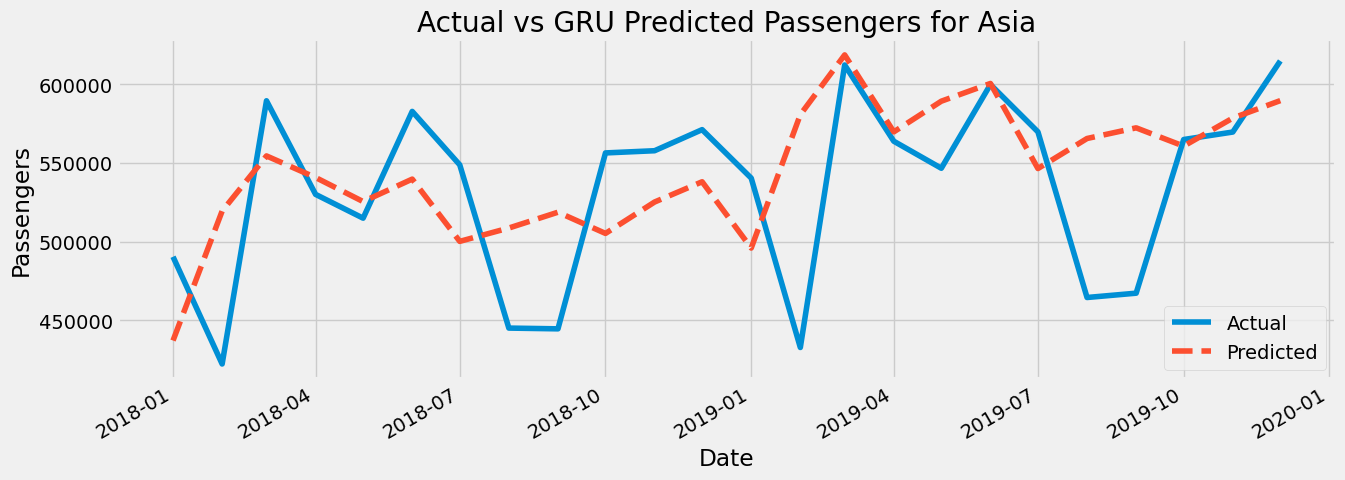

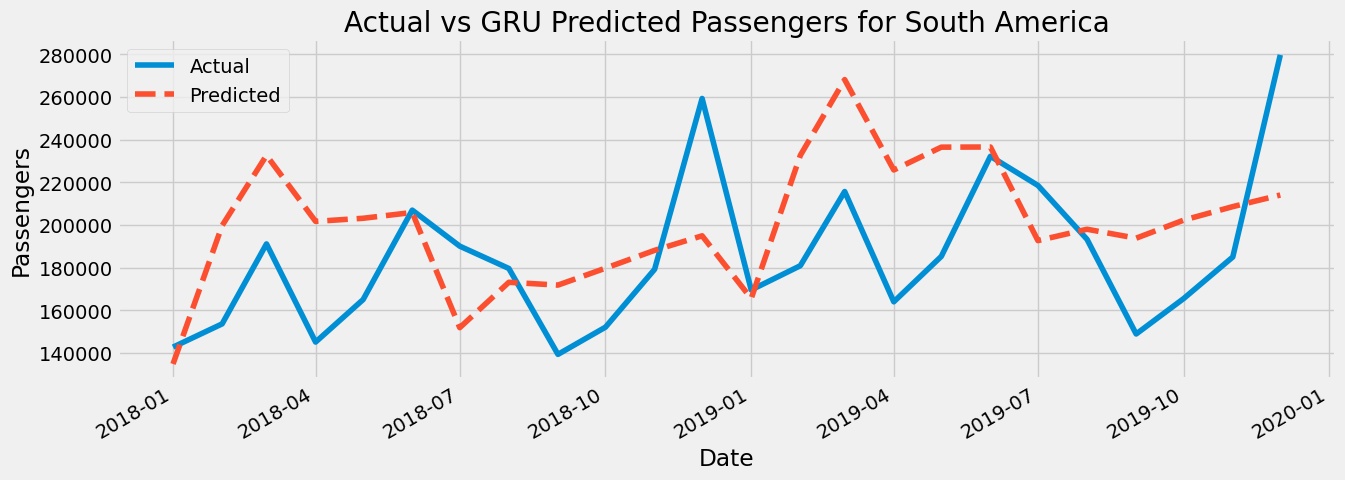

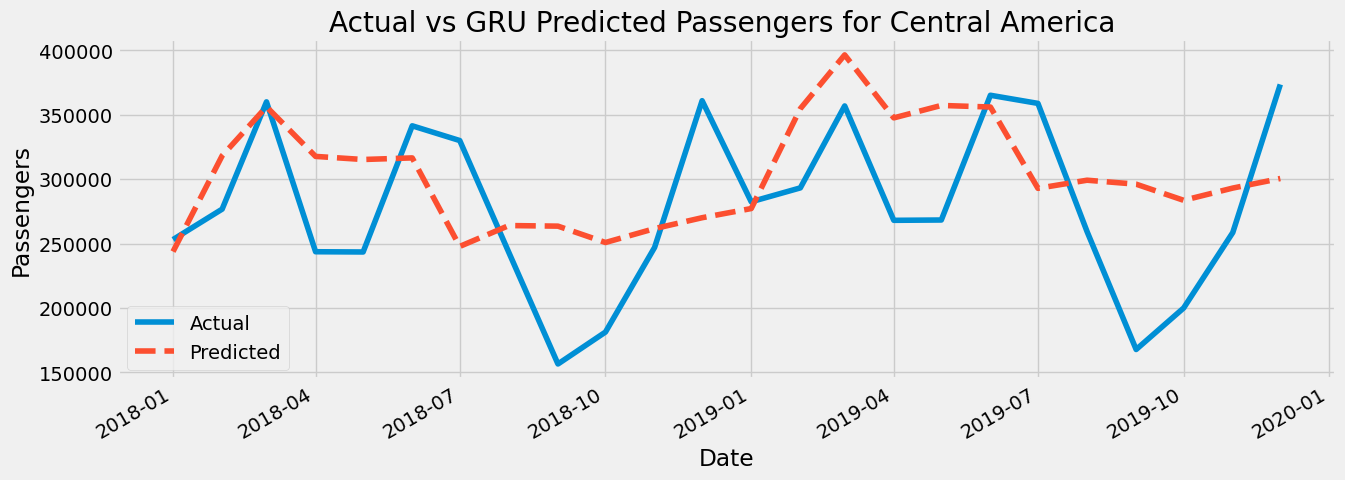

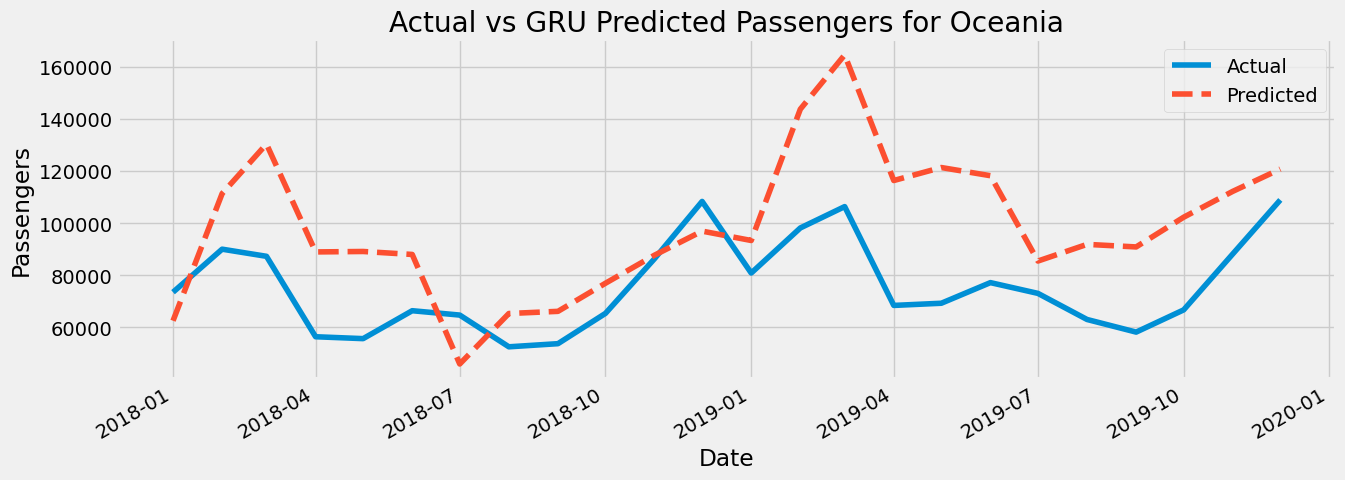

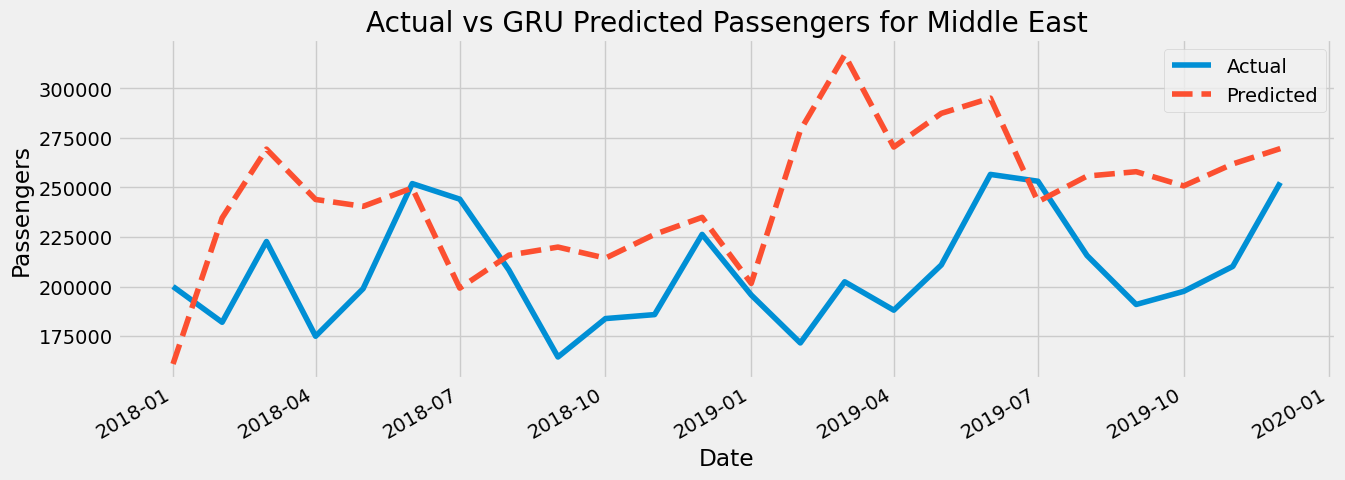

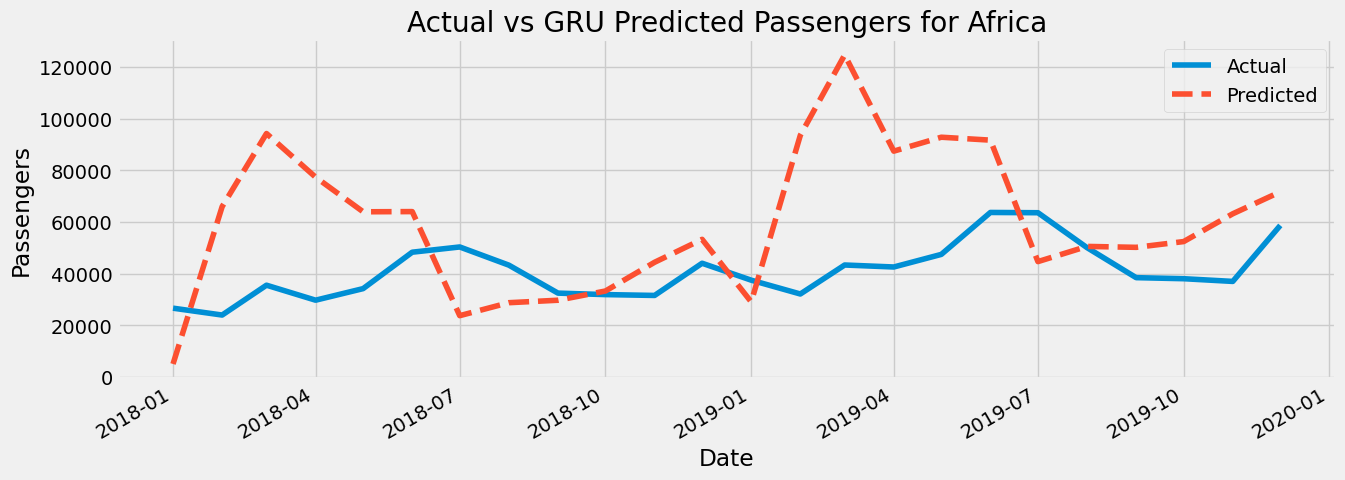

+-----------------+----------+------------+----------+------------------+---------+---------+----------+
| Region          |     RMSE |         R2 |      MAE |             Mean |     AIC |     BIC |    NRMSE |
+=================+==========+============+==========+==================+=========+=========+==========+
| Europe          | 240120   |  0.798413  | 191581   |      1.53298e+06 | 50864.8 | 80435.1 | 0.127231 |
+-----------------+----------+------------+----------+------------------+---------+---------+----------+
| Caribbean       | 140207   |  0.268844  | 110484   | 752919           | 50839   | 80409.3 | 0.235198 |
+-----------------+----------+------------+----------+------------------+---------+---------+----------+
| Asia            |  57905.5 | -0.0078705 |  44509.1 | 533275           | 50796.5 | 80366.8 | 0.300805 |
+-----------------+----------+------------+----------+------------------+---------+---------+----------+
| South America   |  39232.4 | -0.240991  |  33186.3 | 

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log

# Ensure y_train and y_test are NumPy arrays
y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# 1. Preprocess Data: Scale features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train_scaled = target_scaler.fit_transform(y_train_array.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test_array.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features] for GRU
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 2. Build GRU Model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(GRU(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=200, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), verbose=2, shuffle=False)

# 3. Make Predictions
y_pred_scaled = model.predict(X_test_reshaped)

# Inverse transform predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test_scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Define functions to calculate metrics manually
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return sqrt(mse)

def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def calculate_mean(y_true):
    return np.mean(y_true)

def calculate_aic(y_true, y_pred, num_params):
    resid = y_true - y_pred
    sse = np.sum(resid ** 2)
    n = len(y_true)
    sigma2 = sse / n
    log_likelihood = -n / 2 * (np.log(2 * np.pi * sigma2) + 1)
    aic = 2 * num_params - 2 * log_likelihood
    return aic

def calculate_bic(y_true, y_pred, num_params):
    resid = y_true - y_pred
    sse = np.sum(resid ** 2)
    n = len(y_true)
    sigma2 = sse / n
    log_likelihood = -n / 2 * (np.log(2 * np.pi * sigma2) + 1)
    bic = num_params * log(n) - 2 * log_likelihood
    return bic

def calculate_nrmse(y_true, y_pred):
    rmse = calculate_rmse(y_true, y_pred)
    return rmse / (np.max(y_true) - np.min(y_true))

# Merge predictions with the original data
test['prediction'] = y_pred_inv
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Initialize a list to store metrics for each region
metrics_list = []

# Plot data and predictions by region
for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]

    if not region_data.empty:
        # Ensure there are no NaN values in the actual and predicted columns
        region_data = region_data.dropna(subset=['Passengers', 'prediction'])

        # Calculate metrics for the region
        actual = region_data['Passengers'].values
        predicted = region_data['prediction'].values

        if len(actual) > 0 and len(predicted) > 0:
            rmse = calculate_rmse(actual, predicted)
            r2 = calculate_r2(actual, predicted)
            mae = calculate_mae(actual, predicted)
            mean = calculate_mean(actual)
            num_params = model.count_params()  # Number of parameters in the model
            aic = calculate_aic(actual, predicted, num_params)
            bic = calculate_bic(actual, predicted, num_params)
            nrmse = calculate_nrmse(actual, predicted)

            # Append metrics to the list
            metrics_list.append([
                region,
                rmse,
                r2,
                mae,
                mean,
                aic,
                bic,
                nrmse
            ])

            # Plot predictions for the region
            plt.figure(figsize=(14, 5))
            plt.plot(region_data['Date'], actual, label='Actual')
            plt.plot(region_data['Date'], predicted, label='Predicted', linestyle='--')
            plt.title(f'Actual vs GRU Predicted Passengers for {region}')
            plt.xlabel('Date')
            plt.ylabel('Passengers')
            plt.legend()
            plt.grid(True)
            plt.gcf().autofmt_xdate()
            plt.show()

# Define headers for the table
headers = ['Region', 'RMSE', 'R2', 'MAE', 'Mean', 'AIC', 'BIC', 'NRMSE']

# Print the metrics table using tabulate
from tabulate import tabulate
print(tabulate(metrics_list, headers=headers, tablefmt='grid'))

Epoch 1/200


/Users/chinwe/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 1s - 69ms/step - loss: 0.0315 - val_loss: 0.0459
Epoch 2/200
15/15 - 0s - 2ms/step - loss: 0.0171 - val_loss: 0.0291
Epoch 3/200
15/15 - 0s - 2ms/step - loss: 0.0081 - val_loss: 0.0164
Epoch 4/200
15/15 - 0s - 2ms/step - loss: 0.0051 - val_loss: 0.0117
Epoch 5/200
15/15 - 0s - 2ms/step - loss: 0.0051 - val_loss: 0.0119
Epoch 6/200
15/15 - 0s - 2ms/step - loss: 0.0050 - val_loss: 0.0124
Epoch 7/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0124
Epoch 8/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0122
Epoch 9/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0121
Epoch 10/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0121
Epoch 11/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0120
Epoch 12/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0119
Epoch 13/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0118
Epoch 14/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0117
Epoch 15/200
15/15 - 0s - 2ms/step - loss: 0.0047 - va

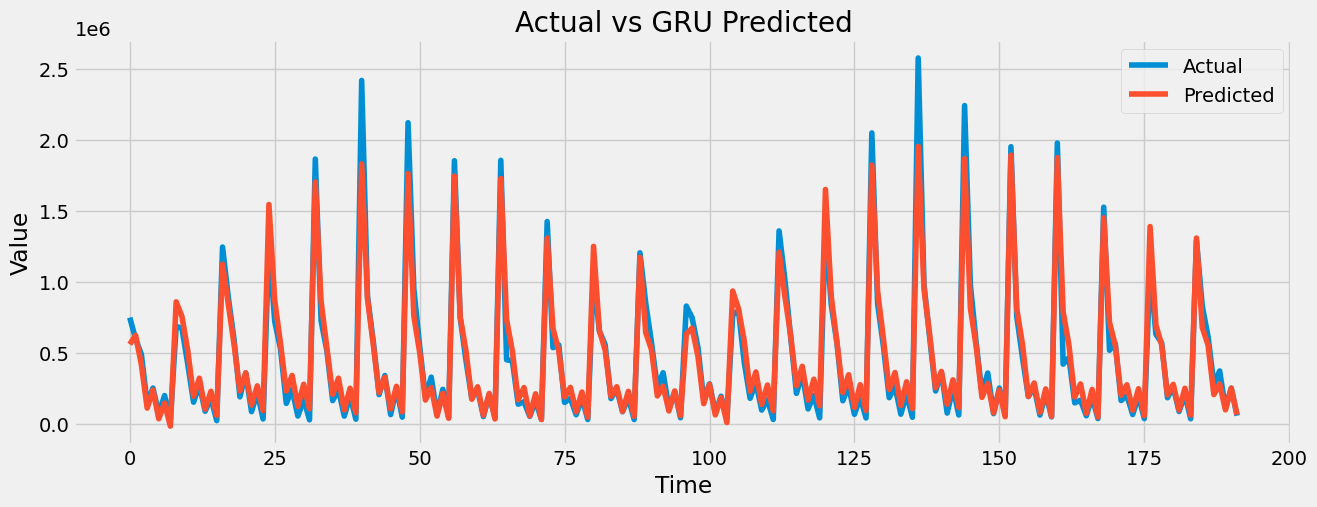

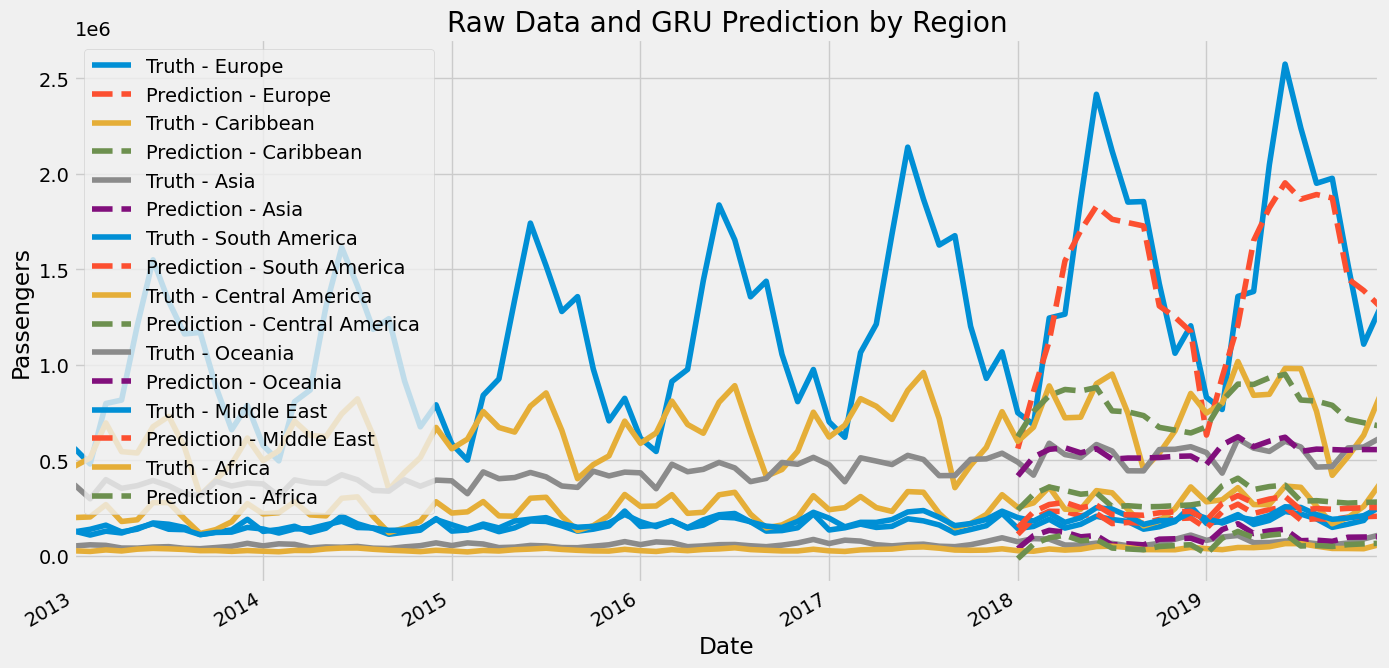

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_train and y_test are NumPy arrays
y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# 1. Preprocess Data: Scale features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train_scaled = target_scaler.fit_transform(y_train_array.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test_array.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features] for GRU
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 2. Build GRU Model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(GRU(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=200, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), verbose=2, shuffle=False)

# 3. Make Predictions
y_pred_scaled = model.predict(X_test_reshaped)

# Inverse transform predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test_scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# 4. Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Merge predictions with the original data
test['prediction'] = y_pred_inv
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# 5. Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs GRU Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot data and predictions by region
fig, ax = plt.subplots(figsize=(15, 8))

for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]
    region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
    region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')

plt.legend()
ax.set_title('Raw Data and GRU Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

### AIC & BIC Included

Epoch 1/200


/Users/chinwe/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 1s - 64ms/step - loss: 0.0271 - val_loss: 0.0400
Epoch 2/200
15/15 - 0s - 2ms/step - loss: 0.0137 - val_loss: 0.0270
Epoch 3/200
15/15 - 0s - 2ms/step - loss: 0.0068 - val_loss: 0.0160
Epoch 4/200
15/15 - 0s - 2ms/step - loss: 0.0051 - val_loss: 0.0126
Epoch 5/200
15/15 - 0s - 2ms/step - loss: 0.0051 - val_loss: 0.0127
Epoch 6/200
15/15 - 0s - 2ms/step - loss: 0.0051 - val_loss: 0.0128
Epoch 7/200
15/15 - 0s - 2ms/step - loss: 0.0050 - val_loss: 0.0127
Epoch 8/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0126
Epoch 9/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0125
Epoch 10/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0124
Epoch 11/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0123
Epoch 12/200
15/15 - 0s - 2ms/step - loss: 0.0049 - val_loss: 0.0122
Epoch 13/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0121
Epoch 14/200
15/15 - 0s - 2ms/step - loss: 0.0048 - val_loss: 0.0120
Epoch 15/200
15/15 - 0s - 2ms/step - loss: 0.0048 - va

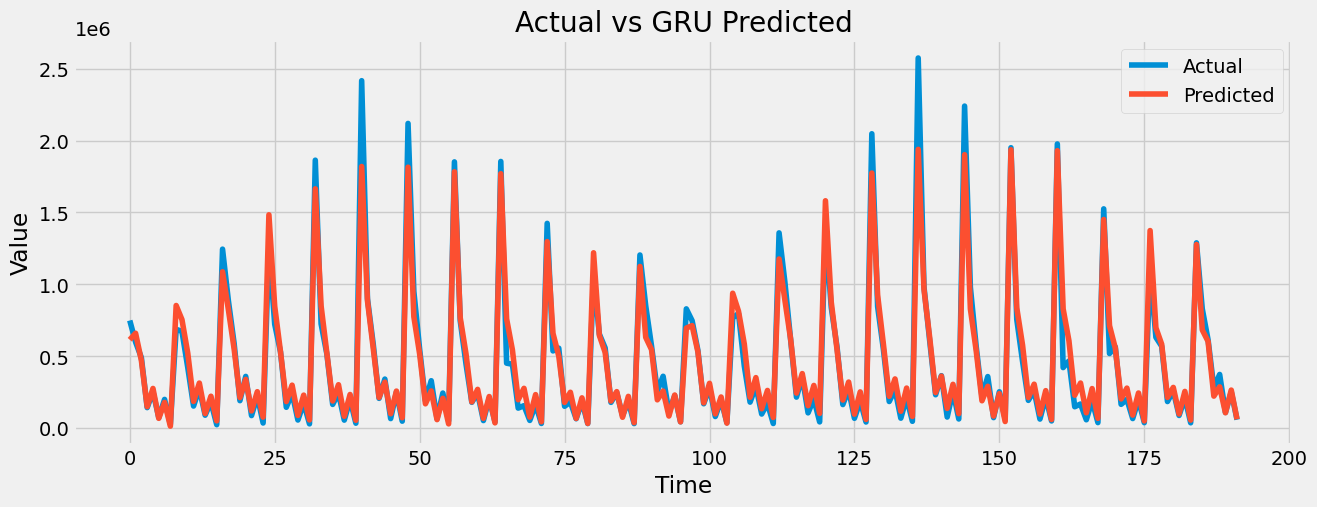

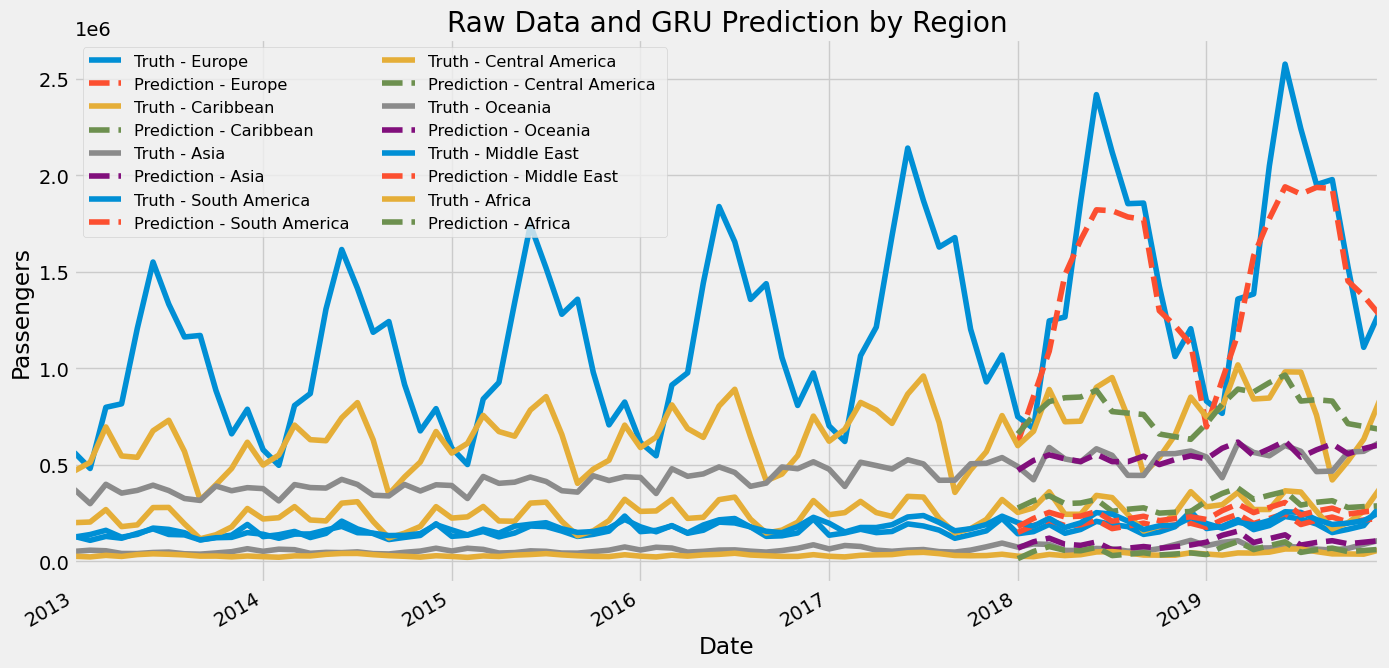

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Ensure y_train and y_test are NumPy arrays
y_train_array = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test_array = y_test.values if isinstance(y_test, pd.Series) else y_test

# 1. Preprocess Data: Scale features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

y_train_scaled = target_scaler.fit_transform(y_train_array.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test_array.reshape(-1, 1))

# Reshape input to be 3D [samples, time steps, features] for GRU
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# 2. Build GRU Model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(GRU(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_reshaped, y_train_scaled, epochs=200, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), verbose=2, shuffle=False)

# 3. Make Predictions
y_pred_scaled = model.predict(X_test_reshaped)

# Inverse transform predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test_scaled)
y_pred_inv = target_scaler.inverse_transform(y_pred_scaled)

# Calculate RSS
rss = np.sum((y_test_inv - y_pred_inv) ** 2)

# Number of data points
n = len(y_test_inv)

# Estimate variance
sigma2 = rss / n

# Calculate log-likelihood
log_likelihood = -n / 2 * (np.log(2 * np.pi * sigma2) + 1)

# Number of parameters (k)
# For GRU, k is the total number of trainable parameters in the model
k = model.count_params()

# Calculate AIC
aic = 2 * k - 2 * log_likelihood

# Calculate BIC
bic = k * np.log(n) - 2 * log_likelihood

print(f'GRU AIC: {aic:0.2f}')
print(f'GRU BIC: {bic:0.2f}')

# 4. Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Merge predictions with the original data
test['prediction'] = y_pred_inv
new_pre_copy_new = new_pre_copy.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# 5. Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Actual vs GRU Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot data and predictions by region
fig, ax = plt.subplots(figsize=(15, 8))

for region in new_pre_copy_new['Regions'].unique():
    region_data = new_pre_copy_new[new_pre_copy_new['Regions'] == region]
    region_data.plot(x='Date', y='Passengers', ax=ax, label=f'Truth - {region}')
    region_data.plot(x='Date', y='prediction', ax=ax, style='--', label=f'Prediction - {region}')

plt.legend(loc='upper left', fontsize='small', ncol=2)
ax.set_title('Raw Data and GRU Prediction by Region')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.gcf().autofmt_xdate()
plt.show()

## Post-Covid Analysis
